In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
# 1. data - johnson aging: traits
johnson_aging = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/Aging/data/0.Traits.csv')
johnson_aging
# PMI - post-mortem interval: how many hours passed after death of the patient

,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_02_gis,0.7,46.7,23.6,1,1
1,ag_03_0247,1.0,55.0,16.0,1,2
2,ag_04_0210,0.0,44.0,27.0,1,3
3,ag_05_0306,0.0,52.0,36.0,1,4
4,ag_06_0120,0.0,42.0,42.0,1,5
...,...,...,...,...,...,...
88,ag_99_0193,1.0,50.0,11.0,3,89
89,ag_100_0081,1.0,62.0,14.0,3,90
90,ag_101_0479,1.0,44.0,13.0,3,91
91,ag_102_0463,1.0,49.0,16.0,3,92


In [30]:
johnson_aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SampleID  93 non-null     object 
 1   Sex       93 non-null     float64
 2   Age       93 non-null     float64
 3   PMI       93 non-null     float64
 4   Batch     93 non-null     int64  
 5   RunOrder  93 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.5+ KB


In [31]:
johnson_aging.columns

Index(['SampleID', 'Sex', 'Age', 'PMI', 'Batch', 'RunOrder'], dtype='object')

In [32]:
# 89 patients were older than 50 
df1 = johnson_aging[johnson_aging['Age'] > 50]
df1

,SampleID,Sex,Age,PMI,Batch,RunOrder
1,ag_03_0247,1.0,55.0,16.0,1,2
3,ag_05_0306,0.0,52.0,36.0,1,4
9,ag_11_0227,1.0,52.0,22.0,1,10
10,ag_12_0289,0.0,68.0,23.0,1,11
13,ag_15_0285,1.0,51.0,26.0,1,14
14,ag_16_0478,1.0,52.0,31.0,1,15
15,ag_17_0080,0.0,61.0,21.0,1,16
22,ag_25_0166,1.0,61.0,25.0,1,23
28,ag_31_0422,1.0,65.0,15.0,1,29
29,ag_32_0038,0.0,57.0,23.6,1,30


In [33]:
df2 = johnson_aging[['Age', 'PMI']].reset_index()
df2

,index,Age,PMI
0,0,46.7,23.6
1,1,55.0,16.0
2,2,44.0,27.0
3,3,52.0,36.0
4,4,42.0,42.0
...,...,...,...
88,88,50.0,11.0
89,89,62.0,14.0
90,90,44.0,13.0
91,91,49.0,16.0


<Axes: title={'center': 'Scattered values of PMI according to the age'}, xlabel='Age', ylabel='PMI'>

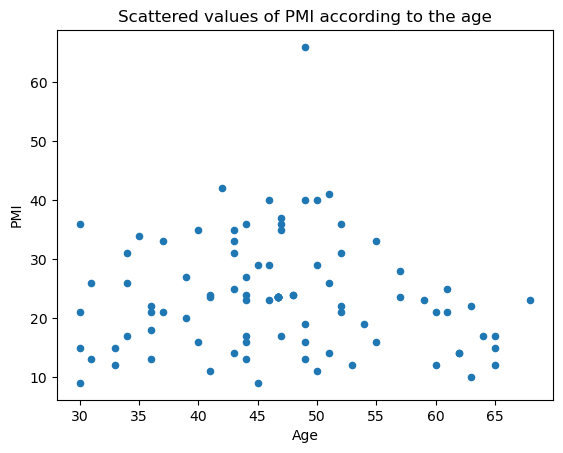

In [34]:
df2.plot.scatter(x = 'Age', y = 'PMI', title = 'Scattered values of PMI according to the age')

In [35]:
johnson_aging.groupby('PMI')['Age'].median().reset_index()

,PMI,Age
0,9.0,37.5
1,10.0,63.0
2,11.0,45.5
3,12.0,56.5
4,13.0,40.0
5,14.0,56.5
6,15.0,33.0
7,16.0,46.5
8,17.0,47.0
9,18.0,36.0


In [36]:
johnson_aging.groupby('PMI')['Age'].count().reset_index()

,PMI,Age
0,9.0,2
1,10.0,1
2,11.0,2
3,12.0,4
4,13.0,4
5,14.0,4
6,15.0,3
7,16.0,4
8,17.0,5
9,18.0,1


Text(0.5, 1.0, 'The boxplot of age and PMI values')

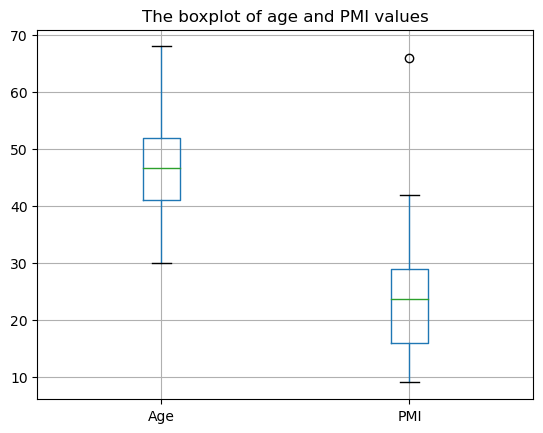

In [37]:
johnson_aging[['Age', 'PMI']].boxplot()
plt.title('The boxplot of age and PMI values')

In [38]:
# Median of PMI = 23.6
johnson_aging['PMI'].median()
# Minimal PMI = 9
johnson_aging['PMI'].min()
# Maximal PMI = 66 (odd value), without it - 42 hours
johnson_aging['PMI'].max()

66.0

In [39]:
# median of age = 46.8
johnson_aging['Age'].median()
# Minimal age = 30
johnson_aging['Age'].min() 
# Maximal age = 68
johnson_aging['Age'].max()

68.0

<Axes: >

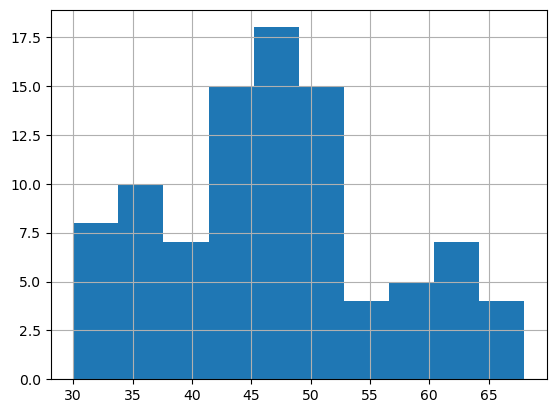

In [40]:
johnson_aging['Age'].hist(bins = 10)

<Axes: >

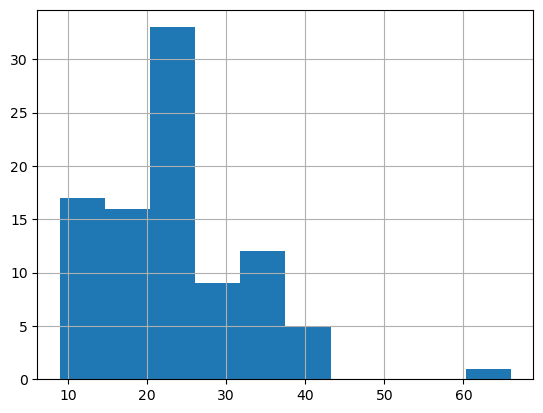

In [41]:
johnson_aging['PMI'].hist(bins = 10)

In [94]:
johnson_aging[['Sex','Age','PMI']].corr()

,Sex,Age,PMI
Sex,1.000000,0.043761,-0.030436
Age,0.043761,1.000000,-0.078557
PMI,-0.030436,-0.078557,1.000000


In [116]:
# 2. data johnson - mayo temporal cortex: traits
# RIN: RNA integrity number (quality of RNA)
johnson_tempcor = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/Mayo_Temporal_Cortex/data/0.Traits.csv')
johnson_tempcor

,SampleID,Samples_Simple Proteomics,Sample RNA,SampleNames,samples,batch,Diagnosis,Sex,ApoE.Genotype,ApoE.Risk,RIN,AgeAtDeath,PMI,Braak,MEGA.exclude
0,b1_mgis_01,b1_01,NaN,mayo_b1_mgis_01,b1_01_mgis,b1,MayoGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,b1_egis_02,b1_02,NaN,mayo_b1_egis_02,b1_02_egis,b1,EmoryGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,b1_094_03,b1_094,11295_TCX,mayo_b1_094_03,b1_094_PSP,b1,PSP,0.0,e23,-1.0,8.1,74.0,8.000000,2.0,True
3,b1_141_04,b1_141,1923_TCX,mayo_b1_141_04,b1_141_Control,b1,Control,1.0,e33,0.0,6.6,89.0,14.000000,2.0,False
4,b1_017_05,b1_017,871_TCX,mayo_b1_017_05,b1_017_AD,b1,AD,0.0,e33,0.0,8.7,90.0,9.523975,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,b5_197_41,b5_197,1950_TCX,mayo_b5_197_41,b5_197_Control,b5,Control,0.0,e44,2.0,5.9,86.0,11.151766,NaN,True
225,b5_101_42,b5_101,11440_TCX,mayo_b5_101_42,b5_101_PSP,b5,PSP,1.0,e23,-1.0,8.2,70.0,8.569241,2.0,True
226,b5_158_43,b5_158,11491_TCX,mayo_b5_158_43,b5_158_PSP,b5,PSP,1.0,e33,0.0,7.8,74.0,14.085747,3.0,True
227,b5_mgis_44,b5_44,NaN,mayo_b5_mgis_44,b5_44_mgis,b5,MayoGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [47]:
johnson_tempcor.dtypes

SampleID                      object
Samples_Simple Proteomics     object
Sample RNA                    object
SampleNames                   object
samples                       object
batch                         object
Diagnosis                     object
Sex                          float64
ApoE.Genotype                 object
ApoE.Risk                    float64
RIN                          float64
AgeAtDeath                   float64
PMI                          float64
Braak                        float64
MEGA.exclude                    bool
dtype: object

In [48]:
johnson_tempcor['ApoE.Genotype'] = johnson_tempcor['ApoE.Genotype'].str.strip()
johnson_tempcor

,SampleID,Samples_Simple Proteomics,Sample RNA,SampleNames,samples,batch,Diagnosis,Sex,ApoE.Genotype,ApoE.Risk,RIN,AgeAtDeath,PMI,Braak,MEGA.exclude
0,b1_mgis_01,b1_01,NaN,mayo_b1_mgis_01,b1_01_mgis,b1,MayoGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,b1_egis_02,b1_02,NaN,mayo_b1_egis_02,b1_02_egis,b1,EmoryGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,b1_094_03,b1_094,11295_TCX,mayo_b1_094_03,b1_094_PSP,b1,PSP,0.0,e23,-1.0,8.1,74.0,8.000000,2.0,True
3,b1_141_04,b1_141,1923_TCX,mayo_b1_141_04,b1_141_Control,b1,Control,1.0,e33,0.0,6.6,89.0,14.000000,2.0,False
4,b1_017_05,b1_017,871_TCX,mayo_b1_017_05,b1_017_AD,b1,AD,0.0,e33,0.0,8.7,90.0,9.523975,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,b5_197_41,b5_197,1950_TCX,mayo_b5_197_41,b5_197_Control,b5,Control,0.0,e44,2.0,5.9,86.0,11.151766,NaN,True
225,b5_101_42,b5_101,11440_TCX,mayo_b5_101_42,b5_101_PSP,b5,PSP,1.0,e23,-1.0,8.2,70.0,8.569241,2.0,True
226,b5_158_43,b5_158,11491_TCX,mayo_b5_158_43,b5_158_PSP,b5,PSP,1.0,e33,0.0,7.8,74.0,14.085747,3.0,True
227,b5_mgis_44,b5_44,NaN,mayo_b5_mgis_44,b5_44_mgis,b5,MayoGlobalInternalStandard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [49]:
johnson_tempcor.duplicated().sum()

0

In [50]:
johnson_tempcor.isna().sum()

SampleID                      0
Samples_Simple Proteomics     0
Sample RNA                   30
SampleNames                   0
samples                       0
batch                         0
Diagnosis                     0
Sex                          30
ApoE.Genotype                30
ApoE.Risk                    31
RIN                          30
AgeAtDeath                   30
PMI                          30
Braak                        33
MEGA.exclude                  0
dtype: int64

In [51]:
johnson_tempcor.isna().sum() / len(johnson_tempcor) * 100

SampleID                      0.000000
Samples_Simple Proteomics     0.000000
Sample RNA                   13.100437
SampleNames                   0.000000
samples                       0.000000
batch                         0.000000
Diagnosis                     0.000000
Sex                          13.100437
ApoE.Genotype                13.100437
ApoE.Risk                    13.537118
RIN                          13.100437
AgeAtDeath                   13.100437
PMI                          13.100437
Braak                        14.410480
MEGA.exclude                  0.000000
dtype: float64

In [52]:
johnson_tempcor['ApoE.Genotype'] = johnson_tempcor['ApoE.Genotype'].fillna('lost')
# johnson_tempcor['ApoE.Risk'] = johnson_tempcor['ApoE.Risk'].fillna('lost')



In [53]:
johnson_tempcor.head(30)

,SampleID,Samples_Simple Proteomics,Sample RNA,SampleNames,samples,batch,Diagnosis,Sex,ApoE.Genotype,ApoE.Risk,RIN,AgeAtDeath,PMI,Braak,MEGA.exclude
0,b1_mgis_01,b1_01,NaN,mayo_b1_mgis_01,b1_01_mgis,b1,MayoGlobalInternalStandard,NaN,lost,NaN,NaN,NaN,NaN,NaN,True
1,b1_egis_02,b1_02,NaN,mayo_b1_egis_02,b1_02_egis,b1,EmoryGlobalInternalStandard,NaN,lost,NaN,NaN,NaN,NaN,NaN,True
2,b1_094_03,b1_094,11295_TCX,mayo_b1_094_03,b1_094_PSP,b1,PSP,0.0,e23,-1.0,8.1,74.0,8.000000,2.0,True
3,b1_141_04,b1_141,1923_TCX,mayo_b1_141_04,b1_141_Control,b1,Control,1.0,e33,0.0,6.6,89.0,14.000000,2.0,False
4,b1_017_05,b1_017,871_TCX,mayo_b1_017_05,b1_017_AD,b1,AD,0.0,e33,0.0,8.7,90.0,9.523975,5.0,False
5,b1_129_06,b1_129,11438_TCX,mayo_b1_129_06,b1_129_PSP,b1,PSP,1.0,e34,1.0,9.5,67.0,3.000000,2.0,True
6,b1_135_07,b1_135,1964_TCX,mayo_b1_135_07,b1_135_Control,b1,Control,1.0,e23,-1.0,9.3,90.0,33.000000,3.0,False
7,b1_147_08,b1_147,1940_TCX,mayo_b1_147_08,b1_147_Control,b1,Control,1.0,e33,0.0,5.3,90.0,14.000000,2.5,False
8,b1_090_09,b1_090,6863_TCX,mayo_b1_090_09,b1_090_PSP,b1,PSP,0.0,e23,-1.0,8.9,80.0,3.000000,3.0,True
9,b1_015_10,b1_015,1036_TCX,mayo_b1_015_10,b1_015_AD,b1,AD,1.0,e33,0.0,8.3,90.0,11.986419,5.0,False


In [54]:
johnson_tempcor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SampleID                   229 non-null    object 
 1   Samples_Simple Proteomics  229 non-null    object 
 2   Sample RNA                 199 non-null    object 
 3   SampleNames                229 non-null    object 
 4   samples                    229 non-null    object 
 5   batch                      229 non-null    object 
 6   Diagnosis                  229 non-null    object 
 7   Sex                        199 non-null    float64
 8   ApoE.Genotype              229 non-null    object 
 9   ApoE.Risk                  198 non-null    float64
 10  RIN                        199 non-null    float64
 11  AgeAtDeath                 199 non-null    float64
 12  PMI                        199 non-null    float64
 13  Braak                      196 non-null    float64

In [55]:
johnson_tempcor.nunique()

SampleID                     229
Samples_Simple Proteomics    229
Sample RNA                   199
SampleNames                  229
samples                      229
batch                          5
Diagnosis                      5
Sex                            2
ApoE.Genotype                  6
ApoE.Risk                      4
RIN                           33
AgeAtDeath                    31
PMI                          107
Braak                         12
MEGA.exclude                   2
dtype: int64

In [56]:
# Why there is no correlation between ApoE genotypes and ApoE.Risk
johnson_tempcor.dropna()
johnson_tempcor.corr()

ValueError: could not convert string to float: 'b1_mgis_01'

Text(0.5, 1.0, 'Boxplot of RIN-values')

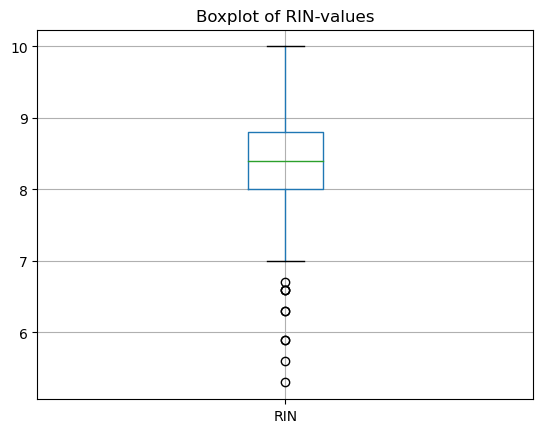

In [103]:
johnson_tempcor[['RIN']].boxplot()
plt.title('Boxplot of RIN-values')

Text(0.5, 1.0, 'Boxplot of PMI-values')

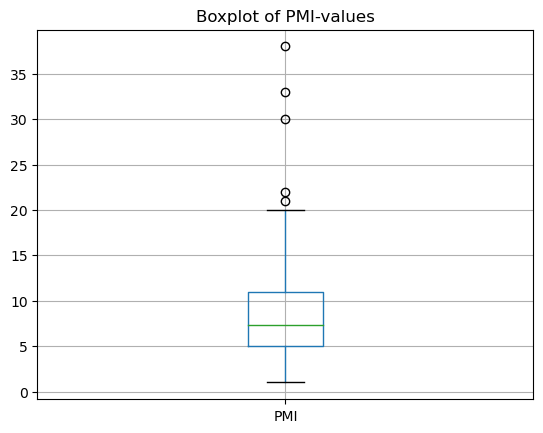

In [104]:
johnson_tempcor[['PMI']].boxplot()
plt.title('Boxplot of PMI-values')

Text(0.5, 1.0, 'Boxplot of age at death')

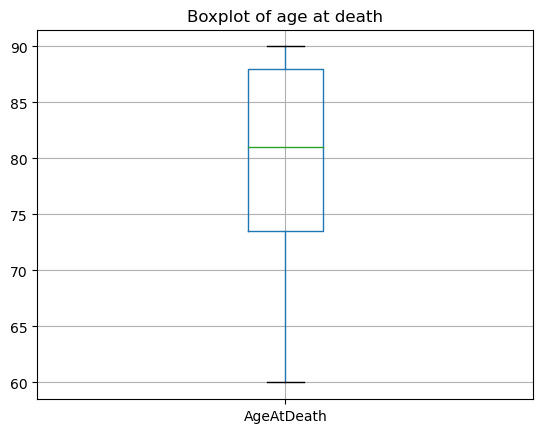

In [102]:
johnson_tempcor[['AgeAtDeath']].boxplot()
plt.title('Boxplot of age at death')

In [57]:
johnson_tempcor['batch'].unique()

array(['b1', 'b2', 'b3', 'b4', 'b5'], dtype=object)

In [58]:
johnson_tempcor.groupby('batch')['ApoE.Genotype'].agg('value_counts')

batch  ApoE.Genotype
b1     e33              25
       e34              10
       lost              6
       e23               4
       e24               1
b2     e33              24
       e34               9
       lost              6
       e23               5
       e44               2
b3     e33              23
       e34               9
       lost              6
       e23               4
       e44               3
       e24               1
b4     e33              22
       e34              11
       lost              6
       e23               4
       e44               3
b5     e33              22
       e34              11
       lost              6
       e23               5
       e44               1
Name: count, dtype: int64

In [59]:
johnson_tempcor.groupby('ApoE.Genotype')['RIN'].agg('max')

ApoE.Genotype
e23      9.5
e24      7.9
e33     10.0
e34     10.0
e44      9.2
lost     NaN
Name: RIN, dtype: float64

In [60]:
johnson_tempcor.groupby('ApoE.Genotype')['RIN'].agg('mean')

ApoE.Genotype
e23     8.463636
e24     7.300000
e33     8.383103
e34     8.504000
e44     8.222222
lost         NaN
Name: RIN, dtype: float64

Text(0.5, 1.0, 'The comparison of batches according the ApoE.Genotyp')

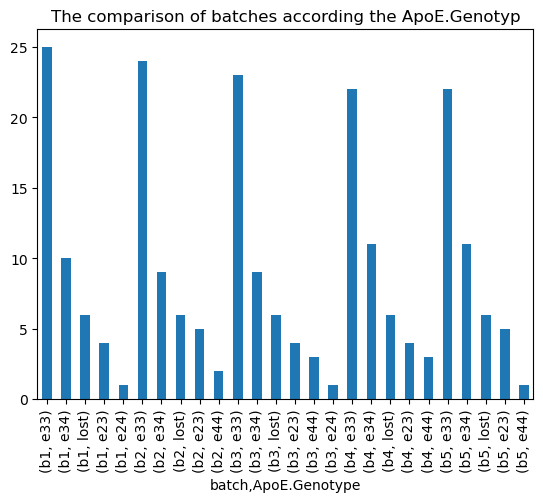

In [105]:
johnson_tempcor.groupby('batch')['ApoE.Genotype'].agg('value_counts').plot.bar();
plt.title('The comparison of batches according the ApoE.Genotyp')

In [62]:
johnson_tempcor.groupby('batch')['Diagnosis'].agg('value_counts')

batch  Diagnosis                  
b1     AD                             18
       PSP                            14
       Control                         8
       EmoryGlobalInternalStandard     3
       MayoGlobalInternalStandard      3
b2     AD                             19
       PSP                            17
       Control                         4
       MayoGlobalInternalStandard      3
       EmoryGlobalInternalStandard     3
b3     PSP                            18
       AD                             15
       Control                         7
       MayoGlobalInternalStandard      3
       EmoryGlobalInternalStandard     3
b4     AD                             18
       PSP                            17
       Control                         5
       MayoGlobalInternalStandard      3
       EmoryGlobalInternalStandard     3
b5     PSP                            18
       AD                             14
       Control                         7
       MayoGlobalInter

Text(0.5, 1.0, 'The comparison of batches according the diagnosis')

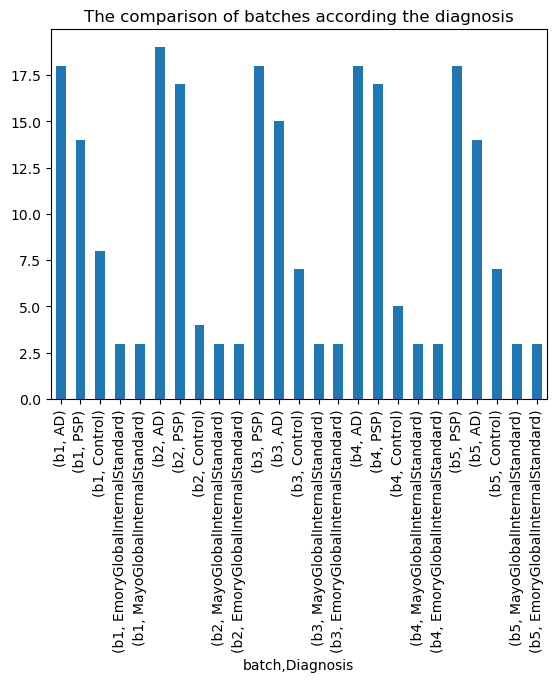

In [106]:
johnson_tempcor.groupby('batch')['Diagnosis'].agg('value_counts').plot.bar();
plt.title('The comparison of batches according the diagnosis')

In [64]:
johnson_tempcor.groupby('batch')[['AgeAtDeath','RIN', 'PMI']].agg('mean')

,AgeAtDeath,RIN,PMI
batch,,,
b1,81.275000,8.407500,8.771548
b2,78.300000,8.375000,7.374674
b3,79.250000,8.397500,7.799873
b4,80.475000,8.501000,9.342205
b5,79.923077,8.338462,9.665633


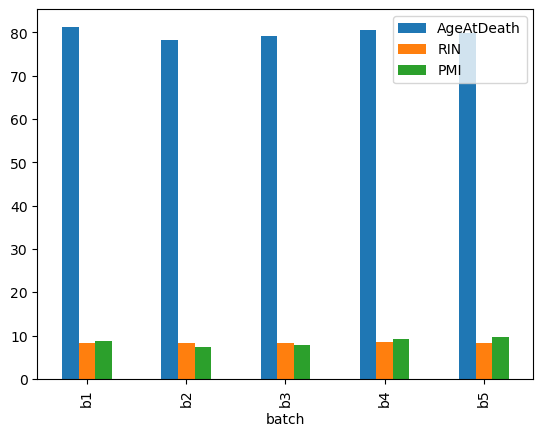

In [65]:
johnson_tempcor.groupby('batch')[['AgeAtDeath','RIN', 'PMI']].agg('mean').plot.bar();

In [66]:
# 5 different diagnosises 
johnson_tempcor['Diagnosis'].unique()

array(['MayoGlobalInternalStandard', 'EmoryGlobalInternalStandard', 'PSP',
       'Control', 'AD'], dtype=object)

In [67]:
johnson_tempcor['ApoE.Genotype'].unique()

array(['lost', 'e23', 'e33', 'e34', 'e24', 'e44'], dtype=object)

In [68]:
johnson_tempcor['ApoE.Risk'].unique()

array([nan, -1.,  0.,  1.,  2.])

In [69]:
johnson_tempcor['RIN'].unique()

array([  nan,  8.1 ,  6.6 ,  8.7 ,  9.5 ,  9.3 ,  5.3 ,  8.9 ,  8.3 ,
        7.9 ,  8.8 ,  8.  ,  9.1 , 10.  ,  8.5 ,  8.6 ,  8.4 ,  7.8 ,
        8.2 ,  9.4 ,  9.  ,  9.2 ,  7.  ,  5.6 ,  6.3 ,  7.7 ,  7.6 ,
        6.7 ,  8.24,  7.1 ,  9.6 ,  9.7 ,  7.3 ,  5.9 ])

In [70]:
johnson_tempcor['AgeAtDeath'].unique()

array([nan, 74., 89., 90., 67., 80., 63., 82., 87., 88., 73., 77., 64.,
       83., 86., 85., 84., 76., 68., 81., 69., 79., 62., 70., 72., 66.,
       71., 60., 61., 78., 75., 65.])

In [71]:
johnson_tempcor['PMI'].max()

38.0

In [72]:
johnson_tempcor[['Diagnosis','AgeAtDeath']]

,Diagnosis,AgeAtDeath
0,MayoGlobalInternalStandard,NaN
1,EmoryGlobalInternalStandard,NaN
2,PSP,74.0
3,Control,89.0
4,AD,90.0
...,...,...
224,Control,86.0
225,PSP,70.0
226,PSP,74.0
227,MayoGlobalInternalStandard,NaN


<Axes: >

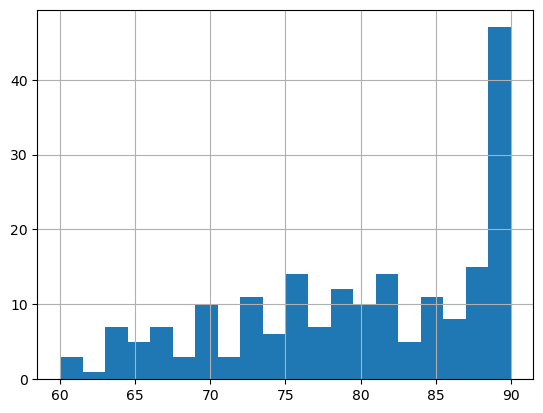

In [73]:
johnson_tempcor['AgeAtDeath'].hist(bins = 20, grid = True)

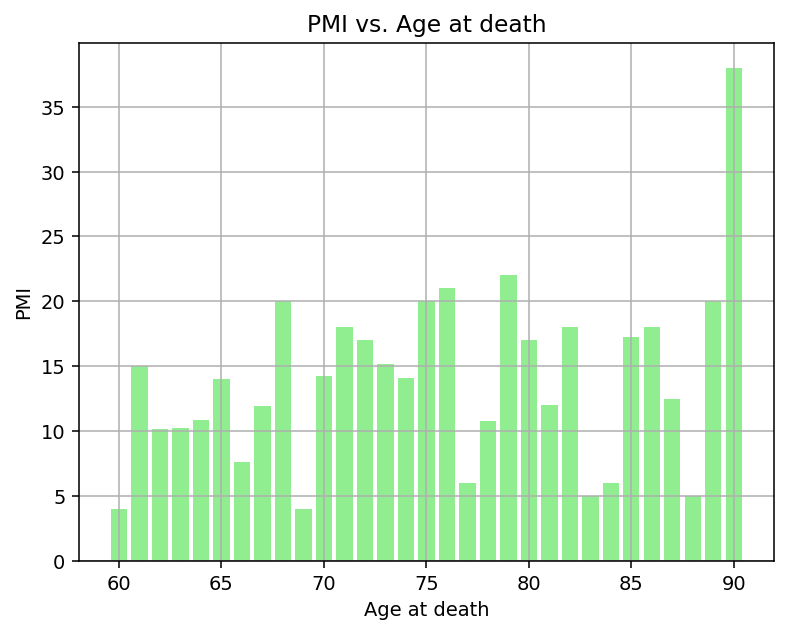

In [74]:
plt.figure(dpi=140)
plt.bar(johnson_tempcor['AgeAtDeath'],johnson_tempcor['PMI'] , color='lightgreen')
plt.title('PMI vs. Age at death')
plt.ylabel('PMI')
plt.xlabel('Age at death')
plt.xticks(rotation=0)
plt.grid(True)
# plt.xticks(sorted(johnson_tempcor['AgeAtDeath'].unique()));

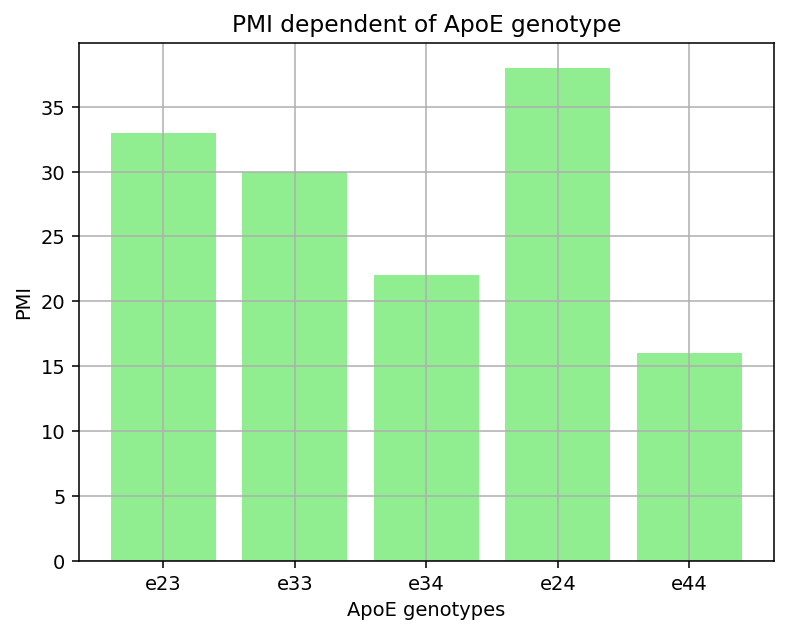

In [75]:
plt.figure(dpi=140)
plt.bar(johnson_tempcor['ApoE.Genotype'], johnson_tempcor['PMI'] , color='lightgreen')
plt.title('PMI dependent of ApoE genotype')
plt.ylabel('PMI')
plt.xlabel('ApoE genotypes')
plt.xticks(rotation=0)
plt.grid(True)

In [76]:
rin_data = johnson_tempcor[['Diagnosis', 'RIN']]
rin_data

,Diagnosis,RIN
0,MayoGlobalInternalStandard,NaN
1,EmoryGlobalInternalStandard,NaN
2,PSP,8.1
3,Control,6.6
4,AD,8.7
...,...,...
224,Control,5.9
225,PSP,8.2
226,PSP,7.8
227,MayoGlobalInternalStandard,NaN


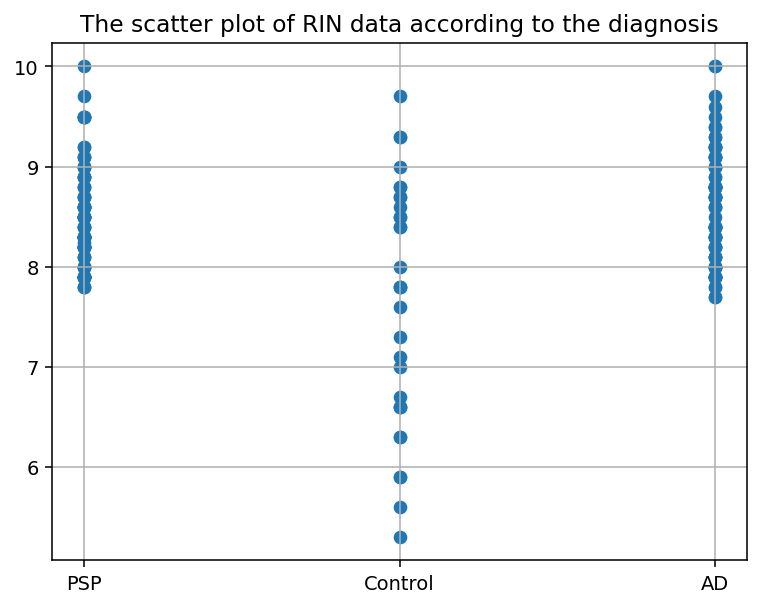

In [77]:
plt.figure(dpi = 140)
plt.scatter(rin_data['Diagnosis'],rin_data['RIN']);
plt.grid(True);
plt.title('The scatter plot of RIN data according to the diagnosis');

Text(0.5, 1.0, 'Types of diagnosis')

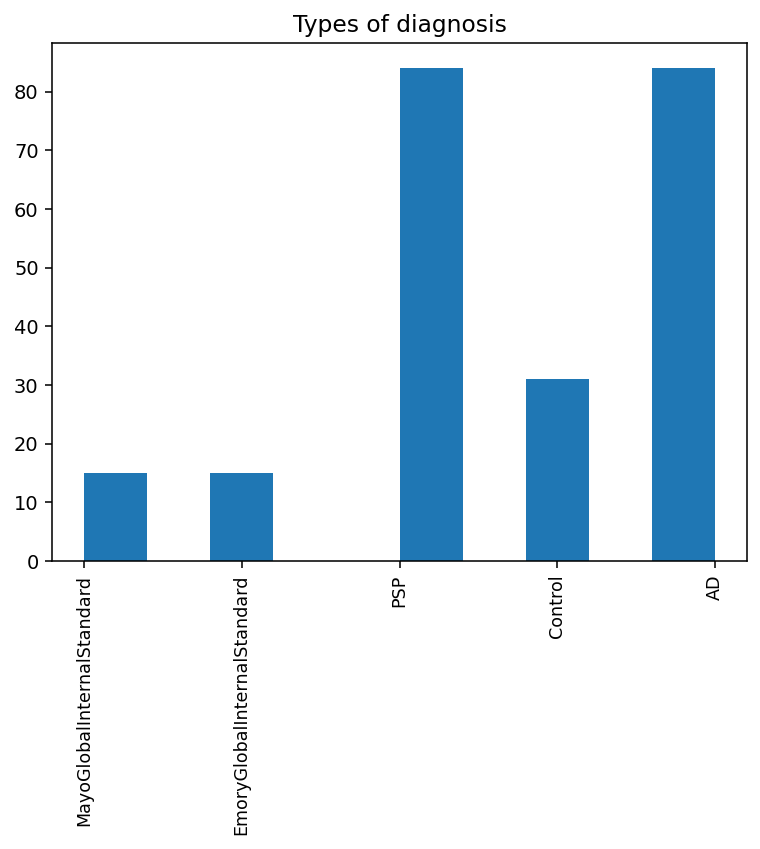

In [78]:
# Histogram
plt.figure(dpi = 140)
# rin_data['Diagnosis'].hist()
plt.hist(rin_data['Diagnosis'])
plt.xticks(sorted((rin_data['Diagnosis'].unique())))
plt.xticks(rotation = 90, size = 9)
plt.title('Types of diagnosis')

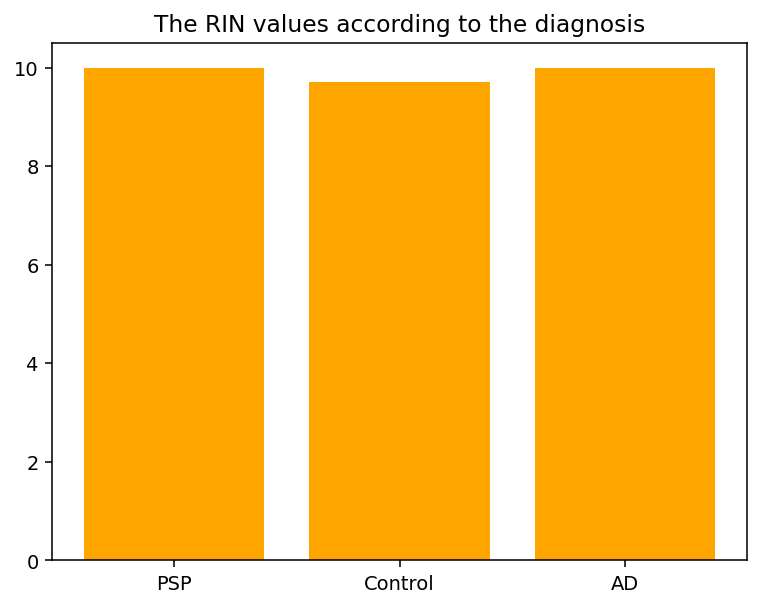

In [79]:
plt.figure(dpi=140)
# plt.scatter(johnson_tempcor['RIN'], johnson_tempcor['Diagnosis'])
plt.bar(johnson_tempcor['Diagnosis'], johnson_tempcor['RIN'], color = 'orange' );
plt.title('The RIN values according to the diagnosis');

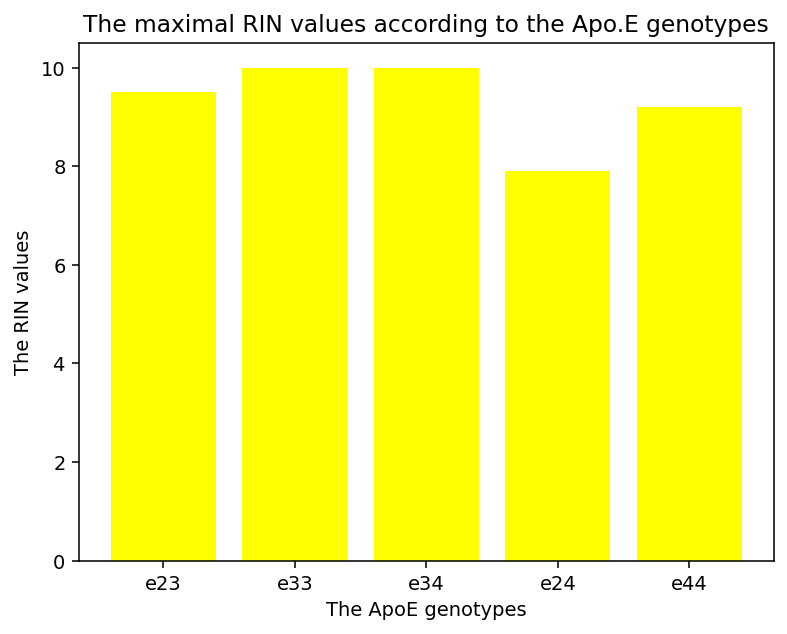

In [80]:
plt.figure(dpi = 140)
plt.bar(johnson_tempcor['ApoE.Genotype'], johnson_tempcor['RIN'], color = 'yellow')
plt.title('The maximal RIN values according to the Apo.E genotypes')
plt.ylabel('The RIN values')
plt.xlabel('The ApoE genotypes');

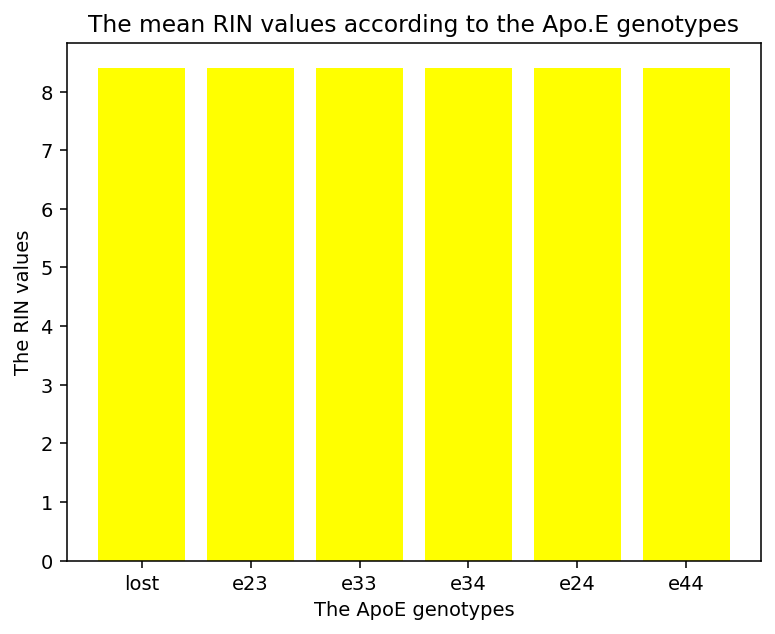

In [81]:
plt.figure(dpi = 140)
plt.bar(johnson_tempcor['ApoE.Genotype'], johnson_tempcor['RIN'].mean(), color = 'yellow')
plt.title('The mean RIN values according to the Apo.E genotypes')
plt.ylabel('The RIN values')
plt.xlabel('The ApoE genotypes');

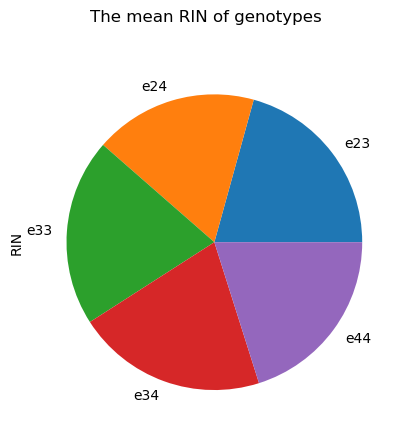

In [82]:
johnson_tempcor.groupby('ApoE.Genotype')['RIN'].agg('mean').plot.pie(subplots = True, \
                                                                     title = 'The mean RIN of genotypes');

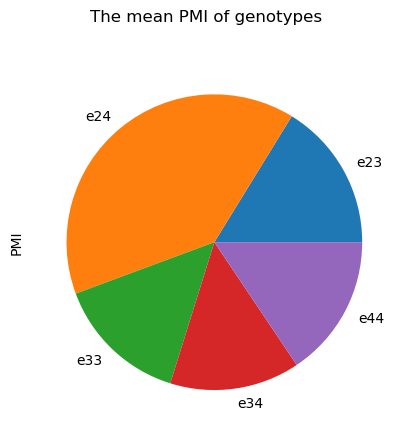

In [83]:
johnson_tempcor.groupby('ApoE.Genotype')['PMI'].agg('mean').plot.pie(subplots = True,\
                                                                     title = 'The mean PMI of genotypes');

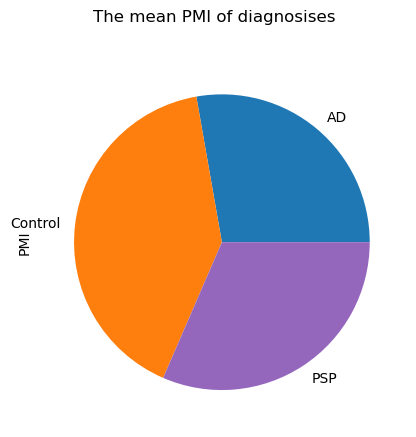

In [84]:
johnson_tempcor.groupby('Diagnosis')['PMI'].agg('mean').plot.pie(subplots = True,\
                                                                title = 'The mean PMI of diagnosises');

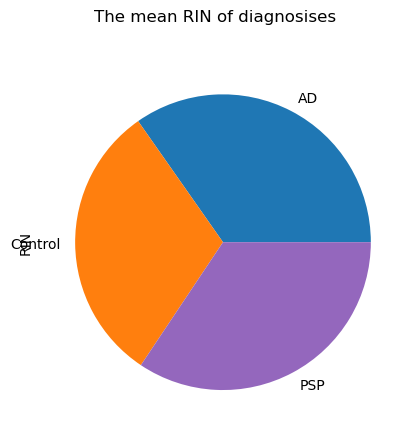

In [85]:
johnson_tempcor.groupby('Diagnosis')['RIN'].agg('mean').plot.pie(subplots = True,\
                                                                title = 'The mean RIN of diagnosises');

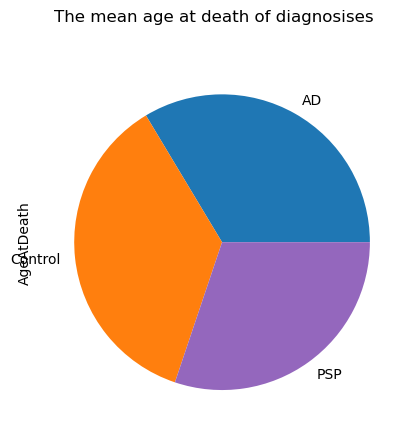

In [86]:
johnson_tempcor.groupby('Diagnosis')['AgeAtDeath'].agg('mean').plot.pie(subplots = True,\
                                                                       title = 'The mean age at death of diagnosises');

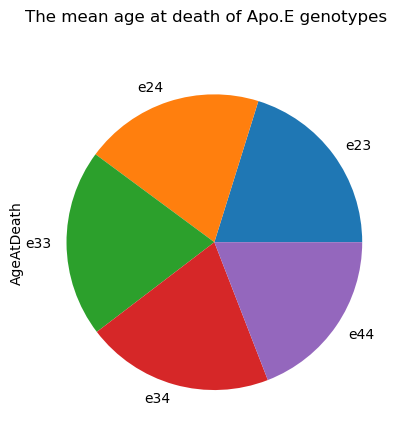

In [87]:
johnson_tempcor.groupby('ApoE.Genotype')['AgeAtDeath'].agg('mean').plot.pie(subplots = True,\
                                                                           title = 'The mean age at death of Apo.E genotypes');

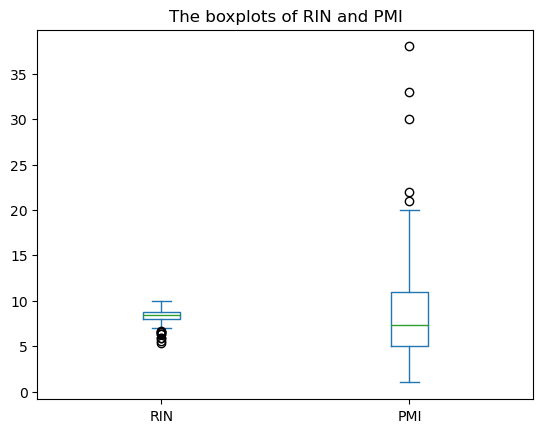

In [88]:
# plt.figure(dpi=140)
# plt.boxplot(johnson_tempcor['PMI'], vert = True, patch_artist = True)
# johnson_tempcor['RIN'].plot.box(set_sticks = (2,2));
# johnson_tempcor['AgeAtDeath'].plot.box();
johnson_tempcor[['RIN', 'PMI']].plot.box(title = 'The boxplots of RIN and PMI');

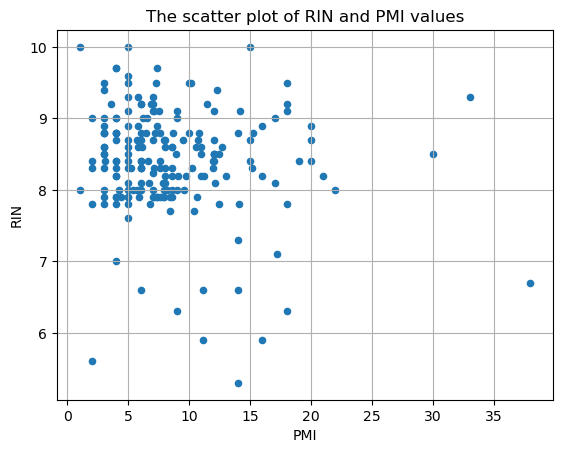

In [89]:
johnson_tempcor.dropna()
johnson_tempcor.plot.scatter(x = 'PMI', y = 'RIN', \
                             title = 'The scatter plot of RIN and PMI values', grid = True);

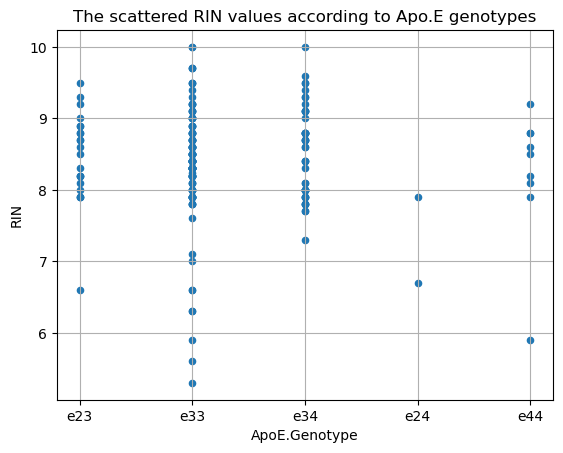

In [90]:
johnson_tempcor.dropna()
johnson_tempcor.plot.scatter('ApoE.Genotype', 'RIN', \
                             title = 'The scattered RIN values according to Apo.E genotypes', grid = True);

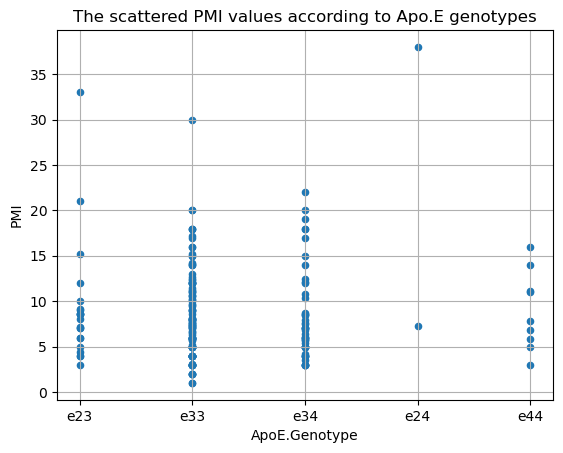

In [91]:
johnson_tempcor.dropna()
johnson_tempcor.plot.scatter('ApoE.Genotype', 'PMI', \
                             title = 'The scattered PMI values according to Apo.E genotypes', grid = True);

In [92]:
johnson_tempcor.groupby('Diagnosis')['RIN'].mean()


Diagnosis
AD                             8.589286
Control                        7.641935
EmoryGlobalInternalStandard         NaN
MayoGlobalInternalStandard          NaN
PSP                            8.500476
Name: RIN, dtype: float64

In [118]:
johnson_tempcor['ApoE.Genotype'].str[1:]

0      NaN
1      NaN
2       23
3       33
4       33
      ... 
224     44
225     23
226     33
227    NaN
228    NaN
Name: ApoE.Genotype, Length: 229, dtype: object

In [120]:
johnson_tempcor.dropna()
johnson_tempcor['ApoE.Genotype'] = johnson_tempcor['ApoE.Genotype'].str[1:]
johnson_tempcor[['Sex', 'ApoE.Genotype', 'ApoE.Risk', 'RIN', 'AgeAtDeath', 'PMI']].corr()

,Sex,ApoE.Genotype,ApoE.Risk,RIN,AgeAtDeath,PMI
Sex,1.000000,-0.120918,-0.116537,0.122296,-0.153909,0.063611
ApoE.Genotype,-0.120918,1.000000,0.838939,-0.009999,-0.034275,-0.088307
ApoE.Risk,-0.116537,0.838939,1.000000,0.006257,-0.040856,-0.039849
RIN,0.122296,-0.009999,0.006257,1.000000,-0.209232,-0.130016
AgeAtDeath,-0.153909,-0.034275,-0.040856,-0.209232,1.000000,0.063849
PMI,0.063611,-0.088307,-0.039849,-0.130016,0.063849,1.000000


In [59]:
# was before
# plt.figure(dpi=140)
# plt.bar(johnson_tempcor['Diagnosis'],johnson_tempcor['RIN'],color='lightgreen')
# plt.ylim(0,12)

In [196]:
# 3. data - johnson LFQ Proteomics: traits
johnson_lfq = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/UPenn_Multiple_Neurodegenerative_Diseases/Discovery_LFQ_Proteomics/data/0.Traits.csv')
johnson_lfq

,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD
3,PENN.b01.06.113,113,1,4.0,12.0,70,1.0,8.0,1.0,1.0,White,PD/PDD,False,True,PD.PDD
4,PENN.b01.05.144,144,1,3.0,18.0,71,1.0,14.0,2.0,0.0,White,Progressive supranuclear palsy,True,True,PSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,PENN.b09.39.313,313,9,35.0,NaN,63,0.0,21.0,0.0,0.0,White,Control,True,True,Control
380,PENN.b09.40.61,61,9,36.0,12.0,78,0.0,23.0,0.0,0.0,White,PD/PDD,True,True,PD.PDD
381,PENN.b09.41.212,212,9,37.0,NaN,78,0.0,4.5,1.0,3.0,White,"Lewy body disease, dementia with Lewy bodies",False,False,LBD
382,PENN.b09.42.9,9,9,38.0,NaN,75,1.0,19.0,NaN,0.0,White,Multiple system atrophy,True,True,MSA


In [197]:
johnson_lfq.head(30)

,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD
3,PENN.b01.06.113,113,1,4.0,12.0,70,1.0,8.0,1.0,1.0,White,PD/PDD,False,True,PD.PDD
4,PENN.b01.05.144,144,1,3.0,18.0,71,1.0,14.0,2.0,0.0,White,Progressive supranuclear palsy,True,True,PSP
5,PENN.b01.07.202,202,1,5.0,NaN,68,1.0,12.0,1.0,3.0,White,"Lewy body disease, dementia with Lewy bodies",False,False,LBD
6,PENN.b01.08.6,6,1,6.0,NaN,47,1.0,24.0,0.0,0.0,White,Amyotrophic lateral sclerosis,True,True,ALS
7,PENN.b01.09.133,133,1,7.0,18.0,78,1.0,21.0,1.0,2.0,White,Progressive supranuclear palsy,False,True,PSP
8,PENN.b01.10.13,13,1,8.0,NaN,78,1.0,8.5,1.0,1.0,White,PD/PDD,True,True,PD.PDD
9,PENN.b01.11.331,331,1,9.0,NaN,64,0.0,6.0,1.0,0.0,Black,Control,False,True,Control


In [198]:
johnson_lfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MaxQuant ID         384 non-null    object 
 1   Sample ID           384 non-null    object 
 2   Batch               384 non-null    int64  
 3   RunOrder            355 non-null    float64
 4   Edu                 171 non-null    float64
 5   Age                 355 non-null    object 
 6   Sex                 355 non-null    float64
 7   PMI                 355 non-null    float64
 8   Braak               289 non-null    float64
 9   CERAD               332 non-null    float64
 10  Race                347 non-null    object 
 11  Dx.Final            355 non-null    object 
 12  Include.MEGA.Clean  384 non-null    bool   
 13  Include.MEGA.Mixed  384 non-null    bool   
 14  Group               355 non-null    object 
dtypes: bool(2), float64(6), int64(1), object(6)
memory usage:

In [199]:
johnson_lfq.dtypes

MaxQuant ID            object
Sample ID              object
Batch                   int64
RunOrder              float64
Edu                   float64
Age                    object
Sex                   float64
PMI                   float64
Braak                 float64
CERAD                 float64
Race                   object
Dx.Final               object
Include.MEGA.Clean       bool
Include.MEGA.Mixed       bool
Group                  object
dtype: object

In [200]:
johnson_lfq.isnull().sum() / len(johnson_lfq) * 100

MaxQuant ID            0.000000
Sample ID              0.000000
Batch                  0.000000
RunOrder               7.552083
Edu                   55.468750
Age                    7.552083
Sex                    7.552083
PMI                    7.552083
Braak                 24.739583
CERAD                 13.541667
Race                   9.635417
Dx.Final               7.552083
Include.MEGA.Clean     0.000000
Include.MEGA.Mixed     0.000000
Group                  7.552083
dtype: float64

In [201]:
# No duplicates
johnson_lfq.duplicated().sum()

0

In [202]:
johnson_lfq['Age'].unique()

array([nan, '59', '66', '70', '71', '68', '47', '78', '64', '61', '56',
       '46', '77', '63', '34', '65', '74', '79', '90+', '67', '83', '72',
       '51', '80', '75', '57', '73', '86', '58', '81', '69', '62', '85',
       '88', '89', '76', '55', '48', '82', '84', '54', '60', '49', '53',
       '43', '42', '52', '87', '31'], dtype=object)

In [203]:
# There is 90+ instead 90
johnson_lfq['Age'] = johnson_lfq['Age'].str.replace('90+', '90', regex = False).astype(float)
johnson_lfq.head(30)

,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59.0,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66.0,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD
3,PENN.b01.06.113,113,1,4.0,12.0,70.0,1.0,8.0,1.0,1.0,White,PD/PDD,False,True,PD.PDD
4,PENN.b01.05.144,144,1,3.0,18.0,71.0,1.0,14.0,2.0,0.0,White,Progressive supranuclear palsy,True,True,PSP
5,PENN.b01.07.202,202,1,5.0,NaN,68.0,1.0,12.0,1.0,3.0,White,"Lewy body disease, dementia with Lewy bodies",False,False,LBD
6,PENN.b01.08.6,6,1,6.0,NaN,47.0,1.0,24.0,0.0,0.0,White,Amyotrophic lateral sclerosis,True,True,ALS
7,PENN.b01.09.133,133,1,7.0,18.0,78.0,1.0,21.0,1.0,2.0,White,Progressive supranuclear palsy,False,True,PSP
8,PENN.b01.10.13,13,1,8.0,NaN,78.0,1.0,8.5,1.0,1.0,White,PD/PDD,True,True,PD.PDD
9,PENN.b01.11.331,331,1,9.0,NaN,64.0,0.0,6.0,1.0,0.0,Black,Control,False,True,Control


In [204]:
# def age_float(cell):
#     try:
#         return float(cell)
#     except ValueError:
#         return float(cell.str.split('+').str[0])

# johnson_lfq['Age'] = johnson_lfq['Age'].apply(age_float)
# johnson_lfq

In [205]:
johnson_lfq.head(30)

,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59.0,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66.0,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD
3,PENN.b01.06.113,113,1,4.0,12.0,70.0,1.0,8.0,1.0,1.0,White,PD/PDD,False,True,PD.PDD
4,PENN.b01.05.144,144,1,3.0,18.0,71.0,1.0,14.0,2.0,0.0,White,Progressive supranuclear palsy,True,True,PSP
5,PENN.b01.07.202,202,1,5.0,NaN,68.0,1.0,12.0,1.0,3.0,White,"Lewy body disease, dementia with Lewy bodies",False,False,LBD
6,PENN.b01.08.6,6,1,6.0,NaN,47.0,1.0,24.0,0.0,0.0,White,Amyotrophic lateral sclerosis,True,True,ALS
7,PENN.b01.09.133,133,1,7.0,18.0,78.0,1.0,21.0,1.0,2.0,White,Progressive supranuclear palsy,False,True,PSP
8,PENN.b01.10.13,13,1,8.0,NaN,78.0,1.0,8.5,1.0,1.0,White,PD/PDD,True,True,PD.PDD
9,PENN.b01.11.331,331,1,9.0,NaN,64.0,0.0,6.0,1.0,0.0,Black,Control,False,True,Control


In [206]:
johnson_lfq.isnull().sum()

MaxQuant ID             0
Sample ID               0
Batch                   0
RunOrder               29
Edu                   213
Age                    29
Sex                    29
PMI                    29
Braak                  95
CERAD                  52
Race                   37
Dx.Final               29
Include.MEGA.Clean      0
Include.MEGA.Mixed      0
Group                  29
dtype: int64

In [207]:
johnson_lfq.isnull().sum() / len(johnson_lfq) * 100

MaxQuant ID            0.000000
Sample ID              0.000000
Batch                  0.000000
RunOrder               7.552083
Edu                   55.468750
Age                    7.552083
Sex                    7.552083
PMI                    7.552083
Braak                 24.739583
CERAD                 13.541667
Race                   9.635417
Dx.Final               7.552083
Include.MEGA.Clean     0.000000
Include.MEGA.Mixed     0.000000
Group                  7.552083
dtype: float64

In [270]:
johnson_lfq['Batch'].nunique()

10

In [208]:
johnson_lfq['PMI'].isnull().sum()

29

In [209]:
johnson_lfq['PMI'].dropna()


1      18.0
2      23.0
3       8.0
4      14.0
5      12.0
       ... 
378    13.0
379    21.0
380    23.0
381     4.5
382    19.0
Name: PMI, Length: 355, dtype: float64

In [210]:
# Deletes everything where NaN
# johnson_lfq.dropna()

In [211]:
johnson_lfq.columns

Index(['MaxQuant ID', 'Sample ID', 'Batch', 'RunOrder', 'Edu', 'Age', 'Sex',
       'PMI', 'Braak', 'CERAD', 'Race', 'Dx.Final', 'Include.MEGA.Clean',
       'Include.MEGA.Mixed', 'Group'],
      dtype='object')

In [268]:
johnson_lfq['Braak'].unique()

array([1., 2., 3., 0.])

In [269]:
johnson_lfq['CERAD'].unique()

array([1., 0., 2., 3.])

In [212]:
johnson_lfq['Race'].unique()

array([nan, 'White', 'Black', 'Multi-racial', 'Asian'], dtype=object)

In [213]:
johnson_lfq['Group'].unique()

array([nan, 'Control', 'PD.PDD', 'PSP', 'LBD', 'ALS', 'AD', 'FTLDU',
       'FTDPc17', 'CBD', 'MSA',
       'Frontotemporal lobar degeneration with ubiquitin inclusions (Also known as FTLD-UPS)',
       'Pathological aging', 'ALSFTD',
       'Frontotemporal lobar degeneration with FUS inclusions (Also known as FTLD-FUS)',
       'Tangle predominant senile dementia', "Pick's disease"],
      dtype=object)

In [214]:
johnson_lfq['Dx.Final'].unique()

array([nan, 'Control', 'PD/PDD', 'Progressive supranuclear palsy',
       'Lewy body disease, dementia with Lewy bodies',
       'Amyotrophic lateral sclerosis', "Alzheimer's disease",
       'Frontotemporal lobar degeneration with TDP inclusions (Also known as FTLD-TDP)',
       'Frontotemporal dementia with parkinsonism linked to chromosome 17',
       'Corticobasal degeneration', 'Multiple system atrophy',
       'Frontotemporal lobar degeneration with ubiquitin inclusions (Also known as FTLD-UPS)',
       'Pathological aging', 'Amyotrophic lateral sclerosis - dementia',
       'Frontotemporal lobar degeneration with FUS inclusions (Also known as FTLD-FUS)',
       'Tangle predominant senile dementia', "Pick's disease"],
      dtype=object)

In [215]:
johnson_lfq['Dx.Final'].notna().sum()

355

In [216]:
johnson_lfq['Dx.Final'].dropna()

1                                           Control
2                                            PD/PDD
3                                            PD/PDD
4                    Progressive supranuclear palsy
5      Lewy body disease, dementia with Lewy bodies
                           ...                     
378                                          PD/PDD
379                                         Control
380                                          PD/PDD
381    Lewy body disease, dementia with Lewy bodies
382                         Multiple system atrophy
Name: Dx.Final, Length: 355, dtype: object

In [217]:
johnson_lfq['PMI'].unique()

array([  nan, 18.  , 23.  ,  8.  , 14.  , 12.  , 24.  , 21.  ,  8.5 ,
        6.  , 11.5 ,  3.5 , 20.  , 12.5 , 16.  ,  7.5 , 19.  ,  6.5 ,
       11.  , 19.5 , 22.  ,  5.5 ,  4.  ,  9.  , 18.5 , 17.  ,  7.  ,
        2.5 , 15.  ,  5.  , 10.  ,  4.5 , 13.5 ,  9.5 , 13.  , 14.75,
       15.5 , 10.5 , 20.5 ,  3.  , 16.5 , 17.5 ])

Text(0.5, 1.0, 'The Boxplots of education level, ages and PMI-values')

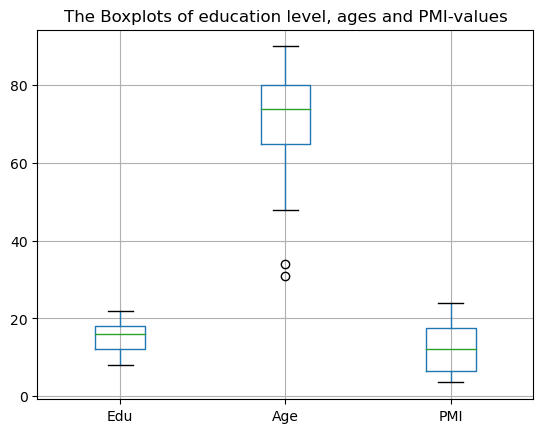

In [242]:
johnson_lfq[['Edu', 'Age', 'PMI']].boxplot()
plt.title('The Boxplots of education level, ages and PMI-values')

In [219]:
diagnosis_lfq = johnson_lfq.groupby('Dx.Final')['PMI'].agg('mean').reset_index()
diagnosis_lfq

,Dx.Final,PMI
0,Alzheimer's disease,12.795918
1,Amyotrophic lateral sclerosis,12.052632
2,Amyotrophic lateral sclerosis - dementia,14.000000
3,Control,14.691489
4,Corticobasal degeneration,11.647059
5,Frontotemporal dementia with parkinsonism link...,9.250000
6,Frontotemporal lobar degeneration with FUS inc...,18.000000
7,Frontotemporal lobar degeneration with TDP inc...,12.724138
8,Frontotemporal lobar degeneration with ubiquit...,6.000000
9,"Lewy body disease, dementia with Lewy bodies",11.500000


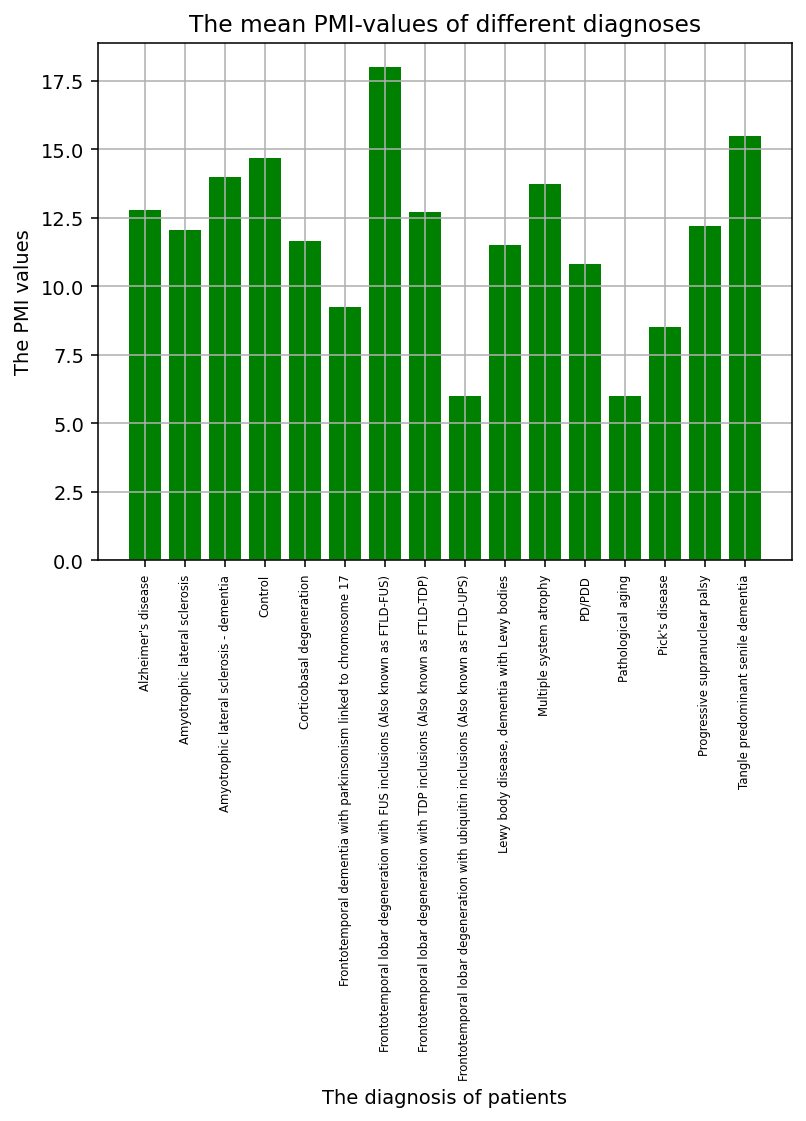

In [244]:
plt.figure(dpi = 140)
plt.bar(diagnosis_lfq['Dx.Final'], diagnosis_lfq['PMI'], color = 'green');
plt.title('The mean PMI-values of different diagnoses');
plt.xlabel('The diagnosis of patients');
plt.ylabel('The PMI values');
plt.grid(True);
plt.xticks(rotation= 90, size = 6);
plt.xticks(sorted(diagnosis_lfq['Dx.Final'].unique()));

In [221]:
group_lfq = johnson_lfq.groupby('Group')['PMI'].agg('mean').reset_index()
group_lfq

,Group,PMI
0,AD,12.795918
1,ALS,12.052632
2,ALSFTD,14.000000
3,CBD,11.647059
4,Control,14.691489
5,FTDPc17,9.250000
6,FTLDU,12.724138
7,Frontotemporal lobar degeneration with FUS inc...,18.000000
8,Frontotemporal lobar degeneration with ubiquit...,6.000000
9,LBD,11.500000


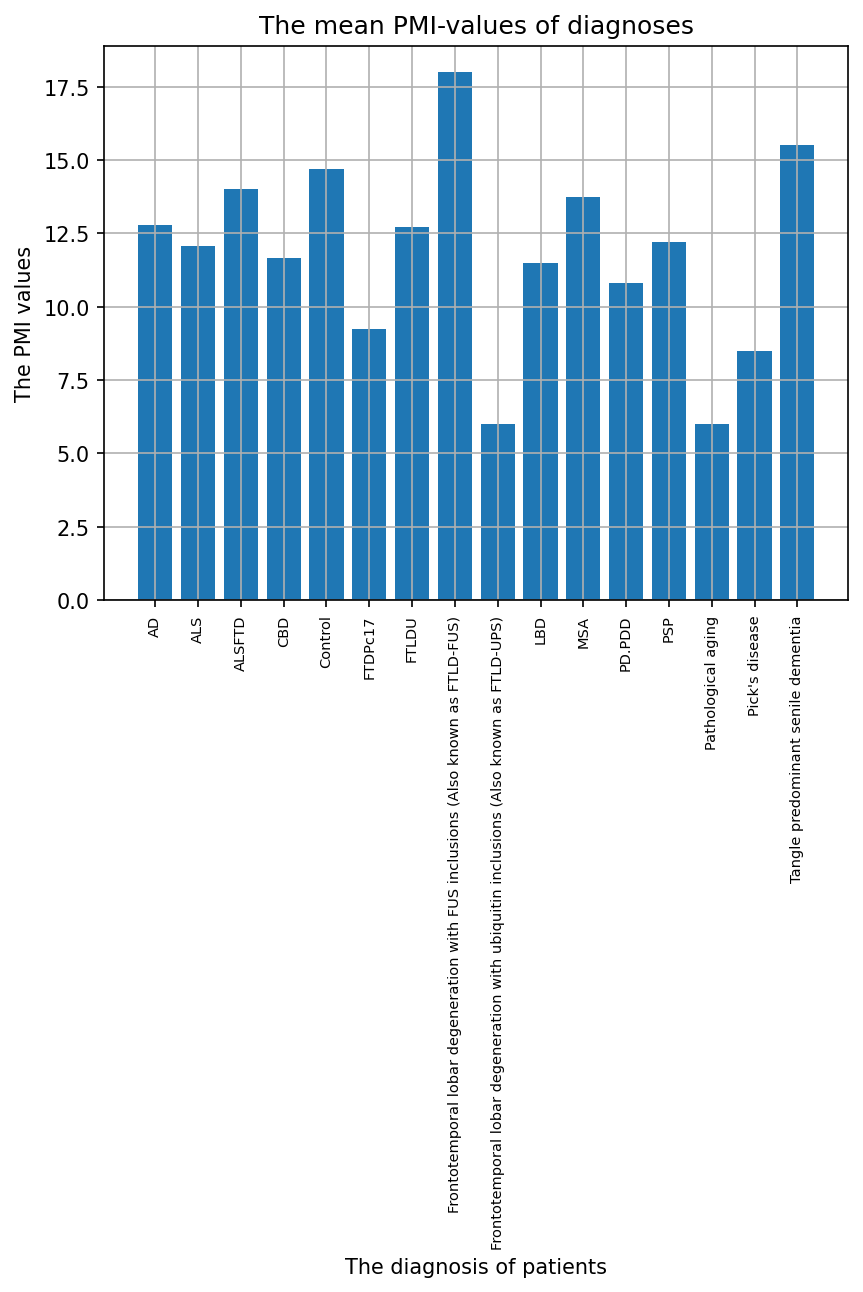

In [245]:
plt.figure(dpi = 150)
plt.bar(group_lfq['Group'], group_lfq['PMI']);
plt.title('The mean PMI-values of diagnoses');
plt.xlabel('The diagnosis of patients');
plt.ylabel('The PMI values');
plt.xticks(size = 7, rotation = 90);
plt.grid(True);

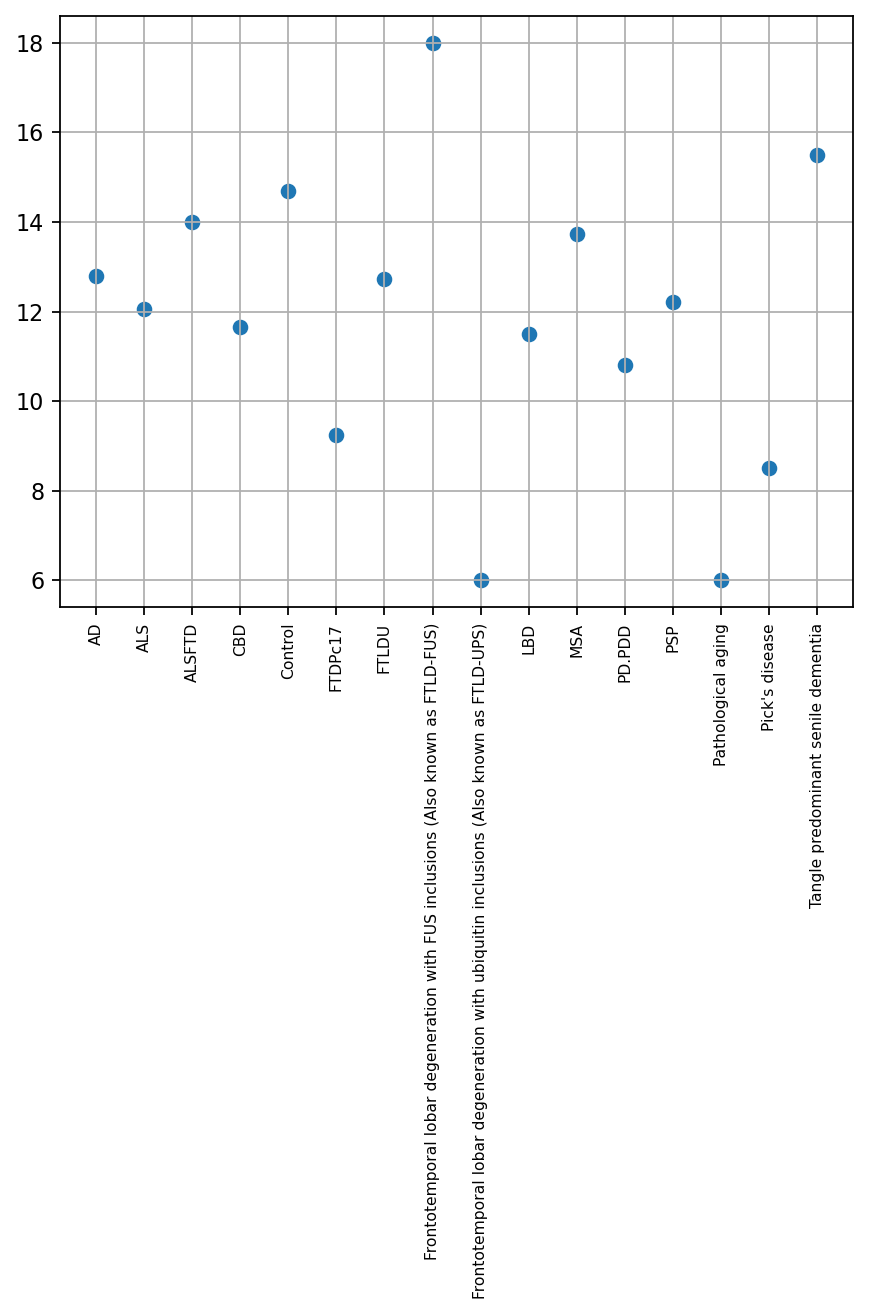

In [223]:
plt.figure(dpi = 160)
plt.scatter(group_lfq['Group'], group_lfq['PMI'])
plt.grid(True)
plt.xticks(size = 7, rotation = 90);


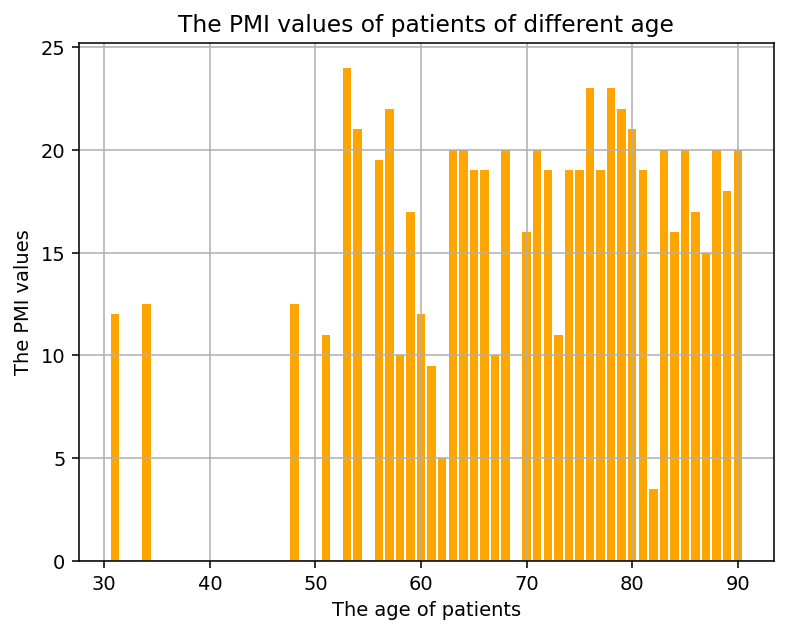

In [246]:
plt.figure(dpi = 140)
plt.bar(johnson_lfq['Age'], johnson_lfq['PMI'], color = 'orange');
plt.grid(True);
plt.title('The PMI values of patients of different age');
plt.xlabel('The age of patients');
plt.ylabel('The PMI values');

In [247]:
age_pmi = johnson_lfq.groupby('Batch').agg({'Age': ['mean'],'PMI' : ['min','mean', 'max']})
age_pmi

Age  PMI                 
            mean  min       mean   max
Batch                                 
1      69.714286  6.0  12.535714  21.0
2      78.272727  4.0  10.636364  22.0
3      75.571429  6.0  14.571429  22.0
4      69.133333  6.0  10.800000  20.0
5      72.250000  4.0  11.312500  21.0
6      71.850000  3.5  13.200000  24.0
7      72.733333  3.5  10.500000  20.0
8      72.894737  4.5  14.026316  22.0
9      73.705882  3.5  11.382353  23.0
10     67.000000  7.0  10.000000  17.0

Text(0.5, 1.0, 'The minimal, average and maximal PMI values of averaged patients in each batch')

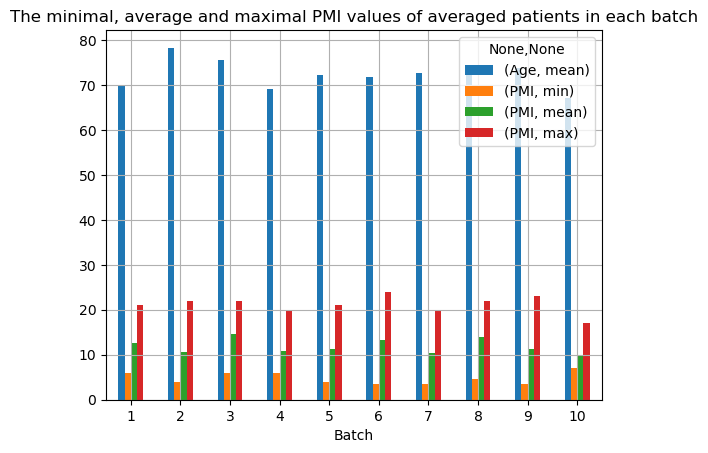

In [248]:
age_pmi.plot.bar(rot = 0, title = 'The minimal, average and maximal PMI values of averaged patients in each batch',\
                 grid = True);
plt.title('The minimal, average and maximal PMI values of averaged patients in each batch')

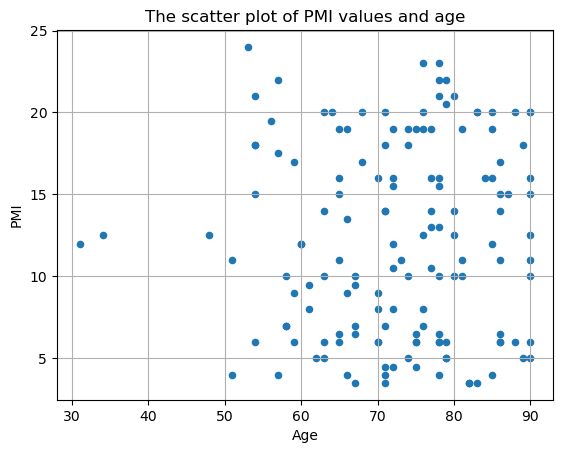

In [249]:
johnson_lfq.plot.scatter(x = 'Age', y = 'PMI', grid = True, title = 'The scatter plot of PMI values and age');


In [250]:
pmi = johnson_lfq[['Dx.Final', 'PMI', 'Age']]
pmi.dropna()

,Dx.Final,PMI,Age
3,PD/PDD,8.0,70.0
4,Progressive supranuclear palsy,14.0,71.0
7,Progressive supranuclear palsy,21.0,78.0
10,Alzheimer's disease,8.0,61.0
14,PD/PDD,14.0,77.0
...,...,...,...
367,Amyotrophic lateral sclerosis,6.0,75.0
368,Alzheimer's disease,5.0,90.0
372,Pick's disease,12.0,31.0
377,Alzheimer's disease,17.5,57.0


In [251]:
pmi_mean = johnson_lfq.groupby('Batch')['Age', 'PMI'].agg('mean')
pmi_mean

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [231]:
pmi_mean.plot.bar(stacked = True, rot = 0, title = 'The stacked plot of age and PMI data in different batches');

NameError: name 'pmi_mean' is not defined

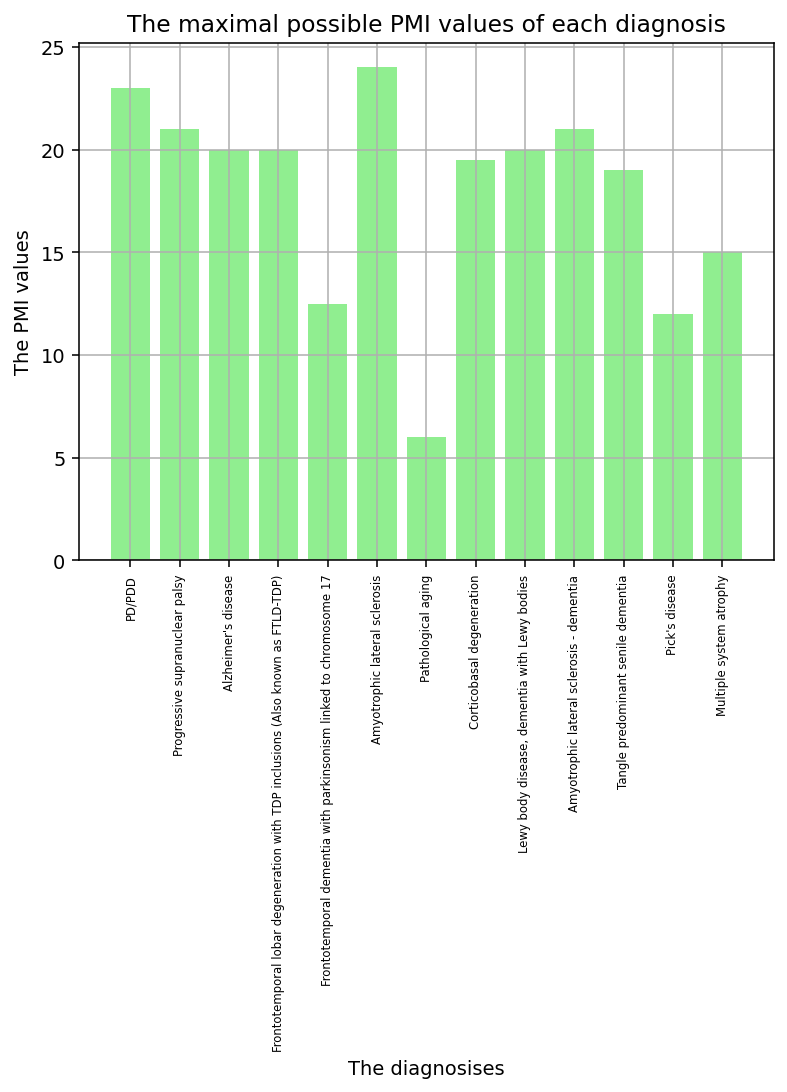

In [234]:
johnson_lfq.dropna(inplace = True)
plt.figure(dpi = 140)
plt.bar(johnson_lfq['Dx.Final'], johnson_lfq['PMI'], color = 'lightgreen');
plt.grid(True);
plt.title('The maximal possible PMI values of each diagnosis')
plt.xlabel('The diagnosises')
plt.ylabel('The PMI values')
plt.xticks(rotation= 90, size = 6);
plt.xticks(sorted(johnson_lfq['Dx.Final'].unique()));

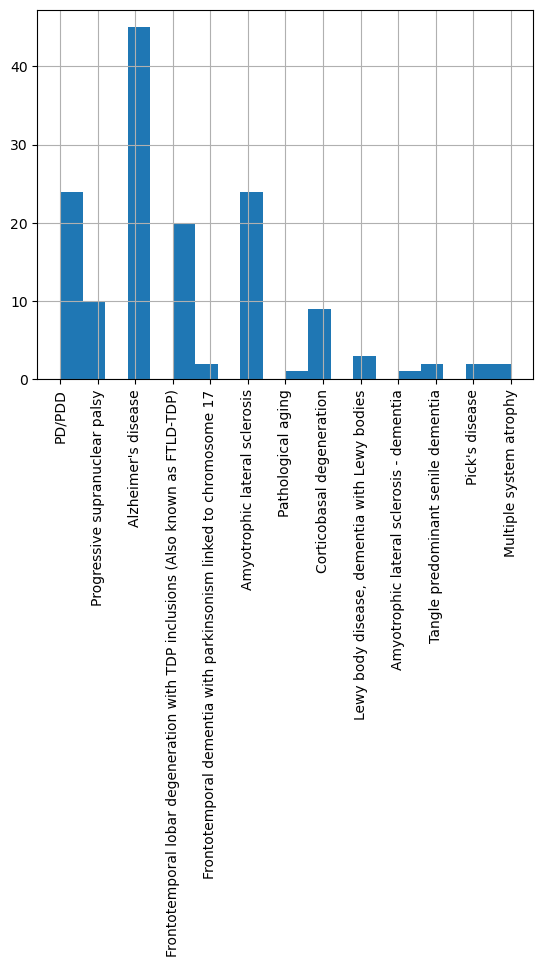

In [235]:
johnson_lfq['Dx.Final'].hist(bins = 20, xrot = 90);

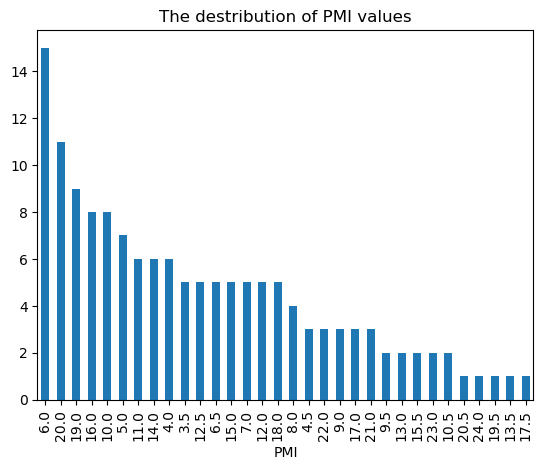

In [236]:
johnson_lfq['PMI'].value_counts().plot.bar(title = 'The destribution of PMI values');

In [237]:
johnson_lfq['Dx.Final'].value_counts()

Dx.Final
Alzheimer's disease                                                               45
PD/PDD                                                                            24
Amyotrophic lateral sclerosis                                                     24
Frontotemporal lobar degeneration with TDP inclusions (Also known as FTLD-TDP)    20
Progressive supranuclear palsy                                                    10
Corticobasal degeneration                                                          9
Lewy body disease, dementia with Lewy bodies                                       3
Frontotemporal dementia with parkinsonism linked to chromosome 17                  2
Tangle predominant senile dementia                                                 2
Pick's disease                                                                     2
Multiple system atrophy                                                            2
Pathological aging                                      

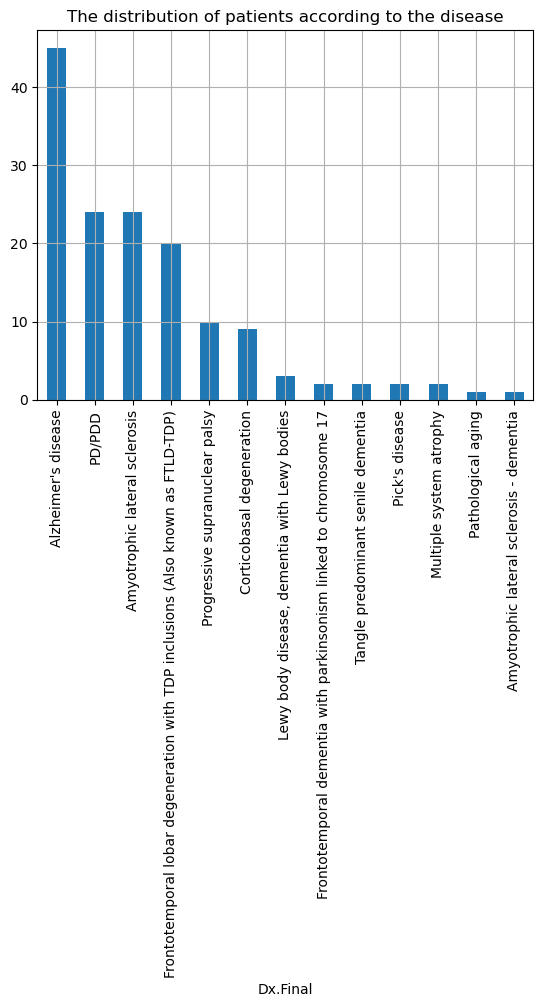

In [266]:
johnson_lfq['Dx.Final'].value_counts().plot.bar()
plt.title('The distribution of patients according to the disease')
plt.grid(True);

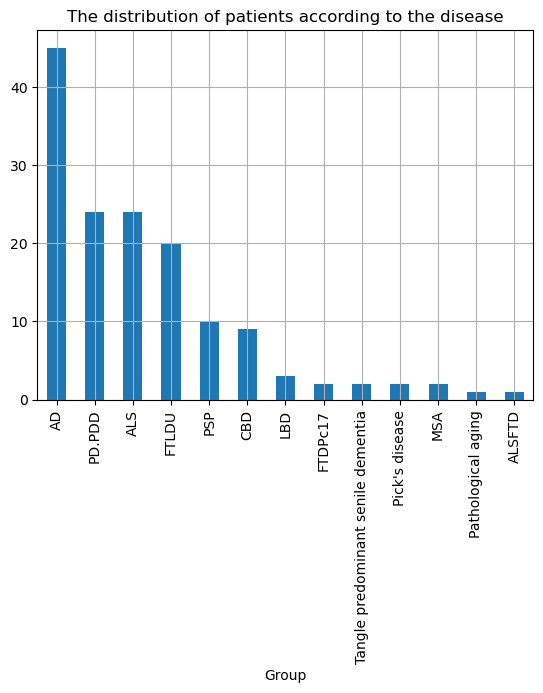

In [267]:
johnson_lfq['Group'].value_counts().plot.bar()
plt.title('The distribution of patients according to the disease')
plt.grid(True);

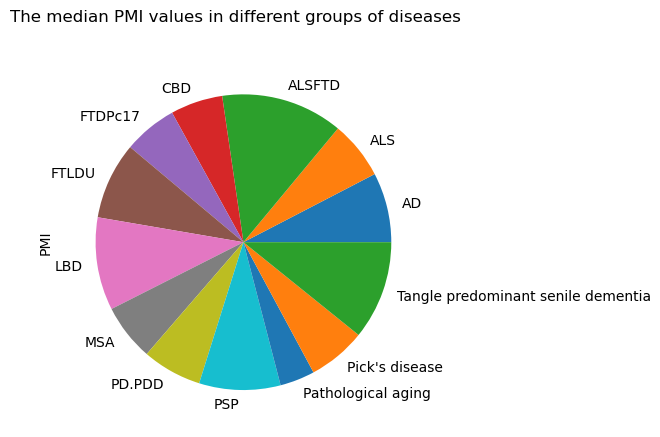

In [238]:
johnson_lfq.groupby('Group')['PMI'].agg('median').plot.pie(subplots = True,\
                                                          title = 'The median PMI values in different groups of diseases');

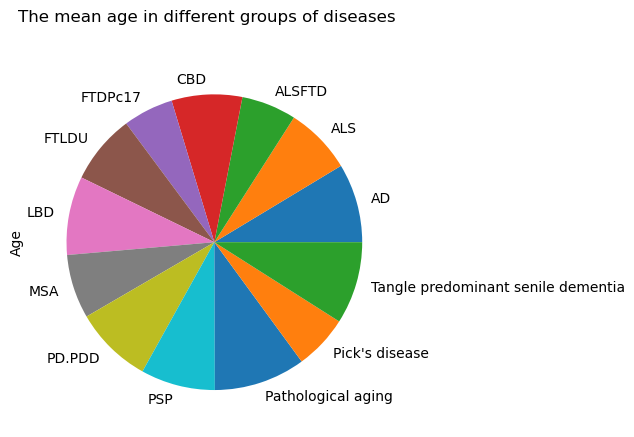

In [239]:
johnson_lfq.groupby('Group')['Age'].agg('mean').plot.pie(subplots = True, \
                                                         title = 'The mean age in different groups of diseases');

In [241]:
johnson_lfq[['Edu', 'Age', 'PMI', 'Braak', 'CERAD']].corr()

,Edu,Age,PMI,Braak,CERAD
Edu,1.000000,0.057806,0.046927,-0.002205,0.002155
Age,0.057806,1.000000,0.025689,0.330301,0.369356
PMI,0.046927,0.025689,1.000000,-0.034984,0.088755
Braak,-0.002205,0.330301,-0.034984,1.000000,0.644058
CERAD,0.002155,0.369356,0.088755,0.644058,1.000000


In [166]:
# 4. data - johnson: BLSA precuneus(traits)

johnson_blsa = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/BLSA_precuneus/data/0.Traits.csv')
johnson_blsa

,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_02_gis,0.7,46.7,23.6,1,1
1,ag_03_0247,1.0,55.0,16.0,1,2
2,ag_04_0210,0.0,44.0,27.0,1,3
3,ag_05_0306,0.0,52.0,36.0,1,4
4,ag_06_0120,0.0,42.0,42.0,1,5
...,...,...,...,...,...,...
88,ag_99_0193,1.0,50.0,11.0,3,89
89,ag_100_0081,1.0,62.0,14.0,3,90
90,ag_101_0479,1.0,44.0,13.0,3,91
91,ag_102_0463,1.0,49.0,16.0,3,92


In [167]:
johnson_blsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SampleID  93 non-null     object 
 1   Sex       93 non-null     float64
 2   Age       93 non-null     float64
 3   PMI       93 non-null     float64
 4   Batch     93 non-null     int64  
 5   RunOrder  93 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.5+ KB


In [168]:
johnson_blsa.dtypes

SampleID     object
Sex         float64
Age         float64
PMI         float64
Batch         int64
RunOrder      int64
dtype: object

In [175]:
df8 = johnson_blsa[johnson_blsa['Age'] > 50]
df8.nunique()

SampleID    27
Sex          2
Age         14
PMI         18
Batch        3
RunOrder    27
dtype: int64

In [170]:
johnson_blsa['SampleID'].nunique()

93

In [150]:
johnson_blsa['PMI'].nunique()

32

In [151]:
johnson_blsa['Age'].nunique()

34

In [152]:
johnson_blsa['PMI'].max()

66.0

In [153]:
johnson_blsa.groupby('Sex')['PMI'].mean()

Sex
0.0    24.048000
0.7    23.600000
1.0    23.389831
Name: PMI, dtype: float64

In [154]:
johnson_blsa.groupby('Age')['PMI'].mean()

Age
30.0    20.250000
31.0    19.500000
33.0    13.500000
34.0    24.666667
35.0    34.000000
36.0    18.500000
37.0    27.000000
39.0    23.500000
40.0    25.500000
41.0    19.533333
42.0    42.000000
43.0    27.600000
44.0    22.285714
45.0    19.000000
46.0    30.666667
46.7    23.600000
47.0    31.250000
48.0    24.000000
49.0    30.800000
50.0    26.666667
51.0    27.000000
52.0    27.500000
53.0    12.000000
54.0    19.000000
55.0    24.500000
57.0    25.800000
59.0    23.000000
60.0    16.500000
61.0    23.000000
62.0    14.000000
63.0    16.000000
64.0    17.000000
65.0    14.666667
68.0    23.000000
Name: PMI, dtype: float64

In [177]:
johnson_blsa.groupby('Batch')[['Age','PMI']].agg('mean')

,Age,PMI
Batch,,
1,46.184848,25.072727
2,44.760606,23.254545
3,49.818519,22.177778


<Axes: >

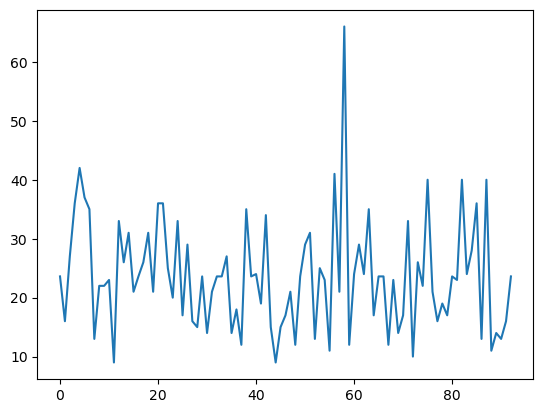

In [156]:
johnson_blsa['PMI'].plot()
plt.title('The PMI values of ages at death')

Text(0.5, 1.0, 'Boxplots of age and PMI')

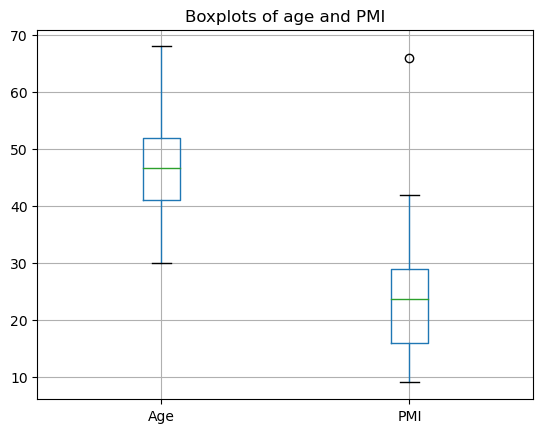

In [179]:
johnson_blsa[['Age', 'PMI']].boxplot()
plt.title('Boxplots of age and PMI')

In [158]:
johnson_blsa['Age'].max()

68.0

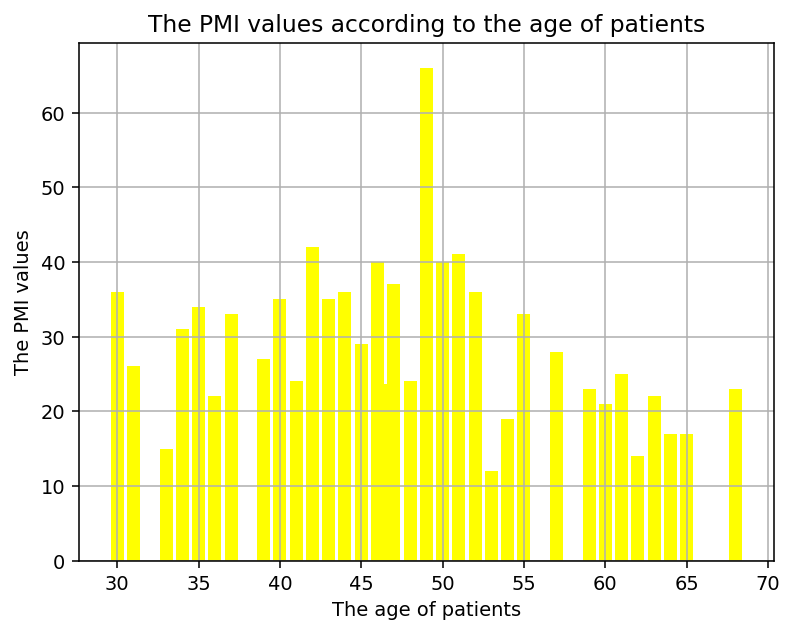

In [159]:
plt.figure(dpi = 140)
plt.bar(johnson_blsa['Age'], johnson_blsa['PMI'], color = 'yellow')
plt.title('The PMI values according to the age of patients')
plt.xlabel('The age of patients')
plt.ylabel('The PMI values')
plt.grid(True);

In [162]:
johnson_blsa[['Sex','Age','PMI']].corr()

,Sex,Age,PMI
Sex,1.000000,0.043761,-0.030436
Age,0.043761,1.000000,-0.078557
PMI,-0.030436,-0.078557,1.000000


In [161]:
# 5.data - johnson CSF samples: traits
johnson_csf = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/CSF/Cohort_1_298-sample_FNIH_Symptomatic_AD_and_Controls/data/0.Traits.csv')
johnson_csf

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e4-4,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,b38.129C,38,51041,Control,73.0,0.0,26.0,391.36,44.98,16.69,0.0,Caucasian or White,NaN,NaN
338,b38.130N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,b38.130C,38,50419,Control,79.0,1.0,25.0,650.64,79.92,19.48,1.0,Caucasian or White,e2-3,-1.0
340,b38.131N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
johnson_csf.head(10)

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e4-4,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
5,b1.130N,1,48747,AD,58.0,1.0,15.0,408.93,109.66,38.27,1.0,Caucasian or White,e3-3,0.0
6,b1.130C,1,54910,Control,61.0,0.0,26.0,430.96,91.75,34.69,1.0,Black or African American,e3-4,1.0
7,b1.131N,1,50055,Control,57.0,0.0,29.0,1010.59,74.47,62.04,0.0,Caucasian or White,NaN,NaN
8,b1.131C,1,45816,AD,52.0,0.0,21.0,390.50,129.84,112.08,1.0,Caucasian or White,e4-4,2.0
9,b2.127N,2,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
johnson_csf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SampleID       342 non-null    object 
 1   Batch          342 non-null    int64  
 2   GUID           339 non-null    object 
 3   Group          338 non-null    object 
 4   Age            297 non-null    float64
 5   Sex            297 non-null    float64
 6   MoCA           296 non-null    float64
 7   AB42.ELISA     296 non-null    float64
 8   tTau.ELISA     296 non-null    float64
 9   pTau.ELISA     296 non-null    float64
 10  DMDfound       296 non-null    float64
 11  Race           297 non-null    object 
 12  APOE.Genotype  180 non-null    object 
 13  APOE.Risk      180 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 37.5+ KB


In [124]:
johnson_csf.dtypes

SampleID          object
Batch              int64
GUID              object
Group             object
Age              float64
Sex              float64
MoCA             float64
AB42.ELISA       float64
tTau.ELISA       float64
pTau.ELISA       float64
DMDfound         float64
Race              object
APOE.Genotype     object
APOE.Risk        float64
dtype: object

In [125]:
johnson_csf['APOE.Genotype'] = johnson_csf['APOE.Genotype'].str.split('-').str[0] + johnson_csf['APOE.Genotype'].str.split('-').str[1]
johnson_csf

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e44,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,b38.129C,38,51041,Control,73.0,0.0,26.0,391.36,44.98,16.69,0.0,Caucasian or White,NaN,NaN
338,b38.130N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,b38.130C,38,50419,Control,79.0,1.0,25.0,650.64,79.92,19.48,1.0,Caucasian or White,e23,-1.0
340,b38.131N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
johnson_csf['SampleID'].duplicated().sum()

0

In [127]:
johnson_csf['APOE.Risk'].unique()

array([nan,  2.,  0.,  1., -1.])

In [128]:
johnson_csf['Batch'].nunique()

38

In [129]:
johnson_csf['Group'].unique()

array(['GIS', 'Control', 'AD', nan], dtype=object)

In [130]:
johnson_csf['Group'].value_counts()

Group
AD         150
Control    147
GIS         41
Name: count, dtype: int64

In [131]:
johnson_csf['Group'].isna().sum()

4

In [132]:
johnson_csf.groupby(['Group', 'Race'])['Age'].agg('mean')

Group    Race                            
AD       American Indian or Alaska Native    61.000000
         Asian                               77.000000
         Black or African American           64.300000
         Caucasian or White                  68.427536
Control  Asian                               68.000000
         Black or African American           65.157895
         Caucasian or White                  65.007874
Name: Age, dtype: float64

In [133]:
johnson_csf.groupby('Group')['AB42.ELISA'].agg('mean')

Group
AD         299.85443
Control    546.75898
GIS              NaN
Name: AB42.ELISA, dtype: float64

<Axes: xlabel='Group', ylabel='AB42.ELISA'>

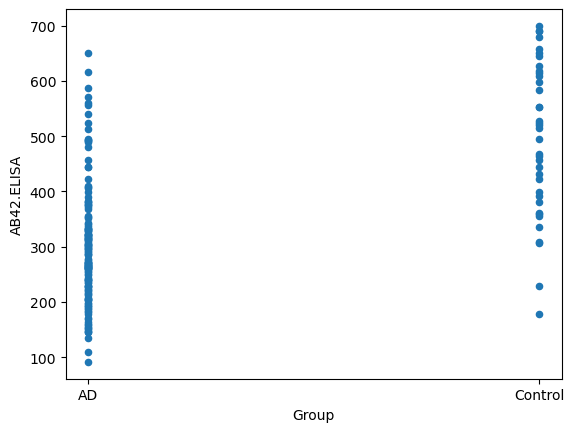

In [134]:
johnson_csf.dropna(inplace = True)
johnson_csf.plot.scatter(x = 'Group', y = 'AB42.ELISA')

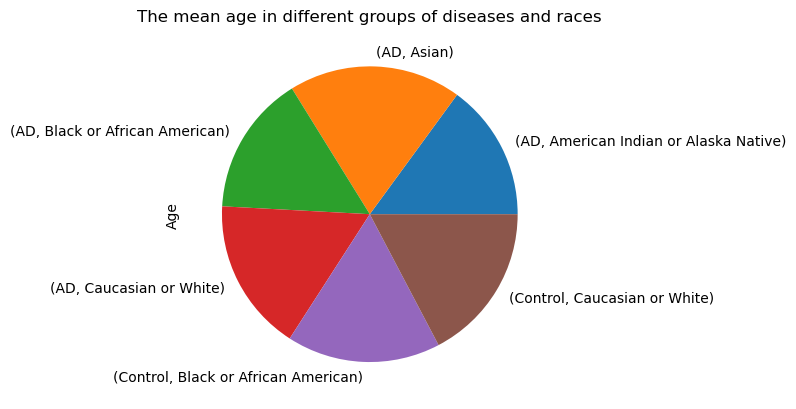

In [135]:
johnson_csf.groupby(['Group', 'Race'])['Age'].agg('mean').plot.pie(title = 'The mean age in different groups of diseases and races');

In [136]:
johnson_csf.groupby('APOE.Genotype')[['AB42.ELISA','tTau.ELISA','pTau.ELISA']].agg('mean')

,AB42.ELISA,tTau.ELISA,pTau.ELISA
APOE.Genotype,,,
e23,420.151429,45.957143,25.272857
e24,376.638000,85.026000,48.494000
e33,383.260000,94.387544,48.601404
e34,333.231786,113.663690,64.111548
e44,251.942963,104.526296,52.289630


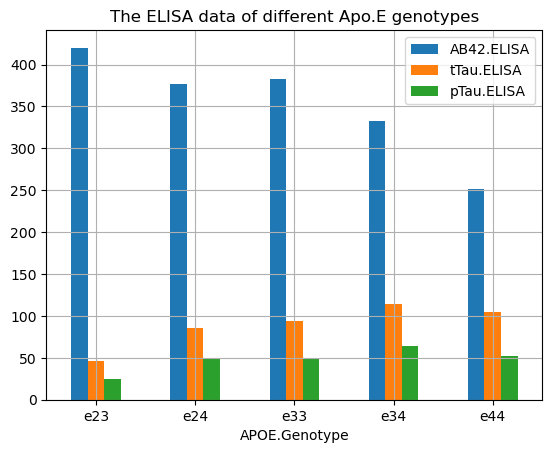

In [182]:
johnson_csf.groupby('APOE.Genotype')[['AB42.ELISA','tTau.ELISA','pTau.ELISA']].agg('mean').plot.bar(title = 'The ELISA data of different Apo.E genotypes',\
                                                                                                    rot =0, grid = True);

In [138]:
johnson_csf.groupby('APOE.Genotype')[['AB42.ELISA','tTau.ELISA','pTau.ELISA']].agg('value_counts')

APOE.Genotype  AB42.ELISA  tTau.ELISA  pTau.ELISA
e23            159.61      64.48       38.90         1
               398.78      31.39       17.43         1
               406.92      52.24       27.53         1
               423.08      30.02       19.40         1
               445.04      26.67       27.68         1
                                                    ..
e44            184.14      93.77       41.09         1
               133.81      67.79       71.11         1
               152.75      109.17      35.99         1
               155.18      123.35      57.31         1
               488.93      29.32       18.50         1
Name: count, Length: 180, dtype: int64

In [139]:
genotypes = johnson_csf[['APOE.Genotype','AB42.ELISA']]
genotypes.dropna()

,APOE.Genotype,AB42.ELISA
2,e44,155.18
5,e33,408.93
6,e34,430.96
8,e44,390.50
10,e33,316.35
...,...,...
327,e34,408.98
332,e34,265.33
335,e34,270.37
339,e23,650.64


Text(0.5, 1.0, 'The distribution of ApoE genotypes')

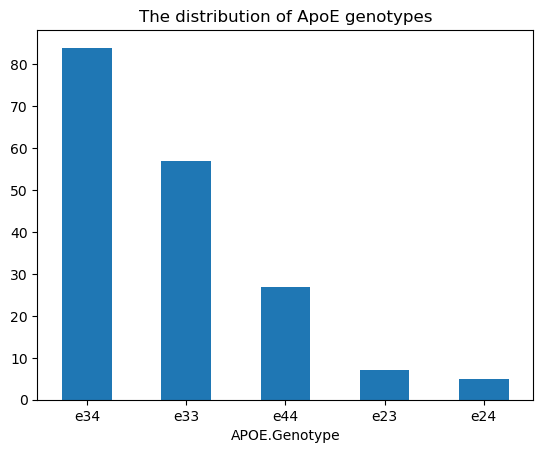

In [140]:
genotypes['APOE.Genotype'].value_counts().plot.bar(rot = 0)
plt.title('The distribution of ApoE genotypes')

<BarContainer object of 180 artists>

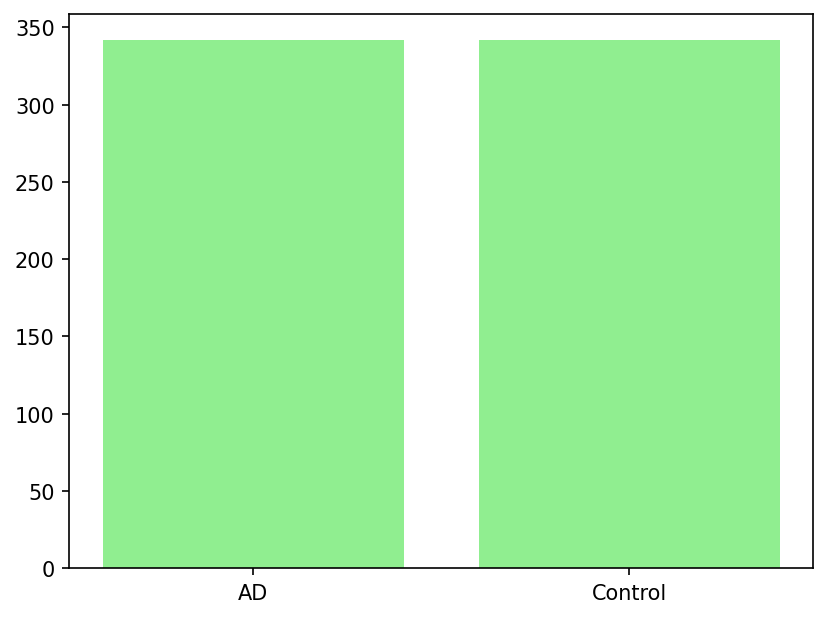

In [141]:
# There is a problem in visualising
plt.figure(dpi = 150)
plt.bar(johnson_csf['Group'], johnson_csf['AB42.ELISA'].mean(), color = 'lightgreen')

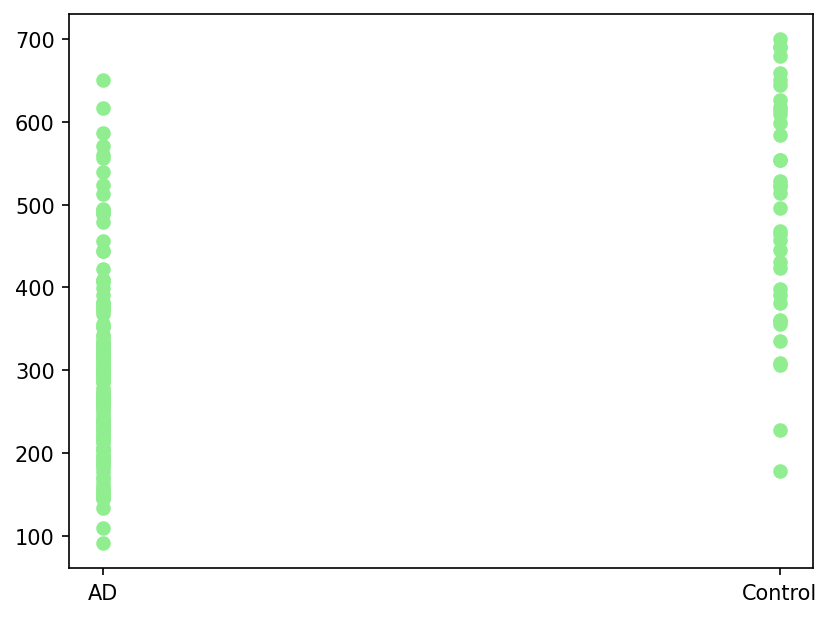

In [142]:
plt.figure(dpi = 150)
plt.scatter(johnson_csf['Group'], johnson_csf['AB42.ELISA'], color = 'lightgreen')

<Axes: xlabel='Group', ylabel='AB42.ELISA'>

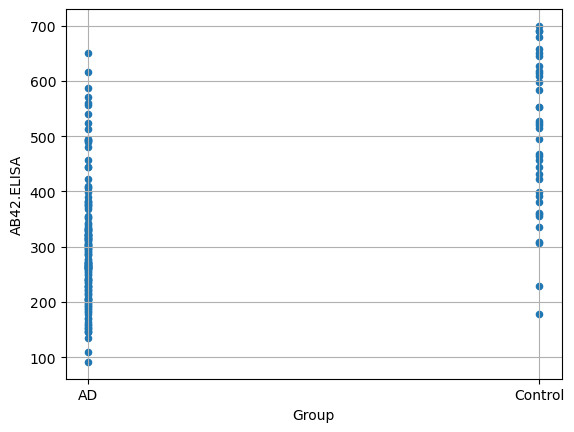

In [143]:
johnson_csf.plot.scatter('Group', 'AB42.ELISA', grid = True)

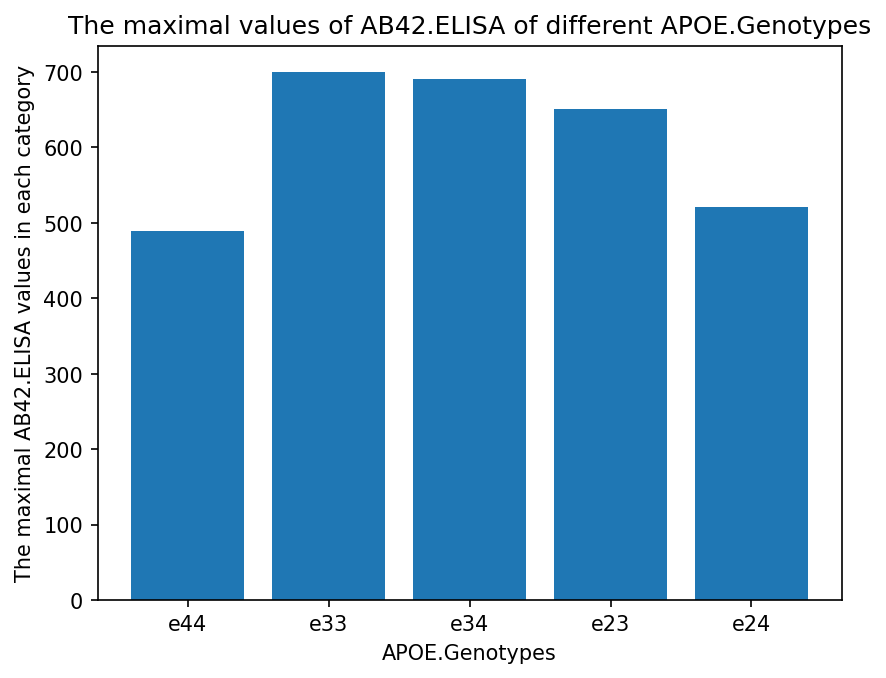

In [184]:
plt.figure(dpi = 150)
plt.bar(johnson_csf['APOE.Genotype'],johnson_csf['AB42.ELISA'])
plt.title('The maximal values of AB42.ELISA of different APOE.Genotypes');
plt.xlabel('APOE.Genotypes')
plt.ylabel('The maximal AB42.ELISA values in each category');

In [185]:
johnson_csf['Race'].unique()

array(['Caucasian or White', 'Black or African American', 'Asian',
       'American Indian or Alaska Native'], dtype=object)

In [186]:
johnson_csf['MoCA'].nunique()

30

In [187]:
johnson_csf.isnull().sum()

SampleID         0
Batch            0
GUID             0
Group            0
Age              0
Sex              0
MoCA             0
AB42.ELISA       0
tTau.ELISA       0
pTau.ELISA       0
DMDfound         0
Race             0
APOE.Genotype    0
APOE.Risk        0
dtype: int64

In [188]:
johnson_csf.isnull().sum() / len(johnson_csf) * 100

SampleID         0.0
Batch            0.0
GUID             0.0
Group            0.0
Age              0.0
Sex              0.0
MoCA             0.0
AB42.ELISA       0.0
tTau.ELISA       0.0
pTau.ELISA       0.0
DMDfound         0.0
Race             0.0
APOE.Genotype    0.0
APOE.Risk        0.0
dtype: float64

Text(0.5, 1.0, 'The boxplots of AB42.ELISA-, tTau.ELISA- and pTau.ELISA measures')

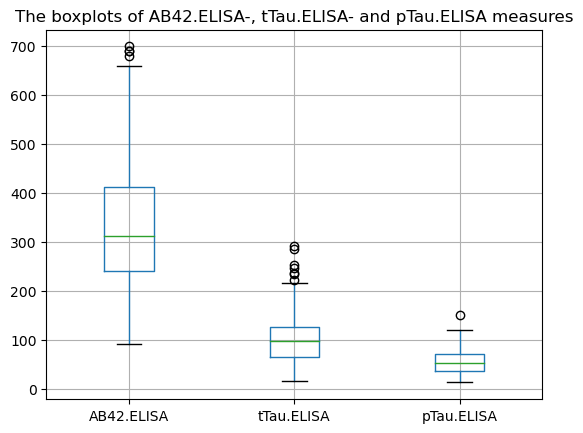

In [145]:
johnson_csf.boxplot(['AB42.ELISA','tTau.ELISA','pTau.ELISA'])
plt.title('The boxplots of AB42.ELISA-, tTau.ELISA- and pTau.ELISA measures')

<Axes: >

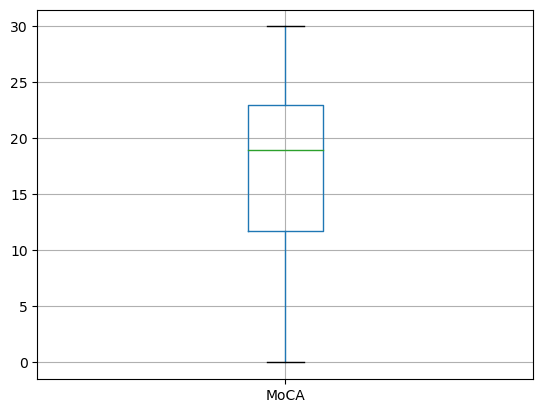

In [190]:
johnson_csf.boxplot('MoCA')

In [191]:
groups = johnson_csf.groupby('Group')[['AB42.ELISA','tTau.ELISA', 'pTau.ELISA']].agg('mean')
groups

,AB42.ELISA,tTau.ELISA,pTau.ELISA
Group,,,
AD,301.496224,115.304056,62.394895
Control,495.947027,54.281081,28.767027


In [192]:
johnson_csf['APOE.Genotype'].unique()

array(['e44', 'e33', 'e34', 'e23', 'e24'], dtype=object)

In [181]:
johnson_csf['APOE.Genotype'] = johnson_csf['APOE.Genotype'].str.split('-').str[0] + johnson_csf['APOE.Genotype'].str.split('-').str[1]
johnson_csf

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e44,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,b38.129C,38,51041,Control,73.0,0.0,26.0,391.36,44.98,16.69,0.0,Caucasian or White,NaN,NaN
338,b38.130N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,b38.130C,38,50419,Control,79.0,1.0,25.0,650.64,79.92,19.48,1.0,Caucasian or White,e23,-1.0
340,b38.131N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
johnson_csf['APOE.Genotype'].isna().sum() / len(johnson_csf) * 100

100.0

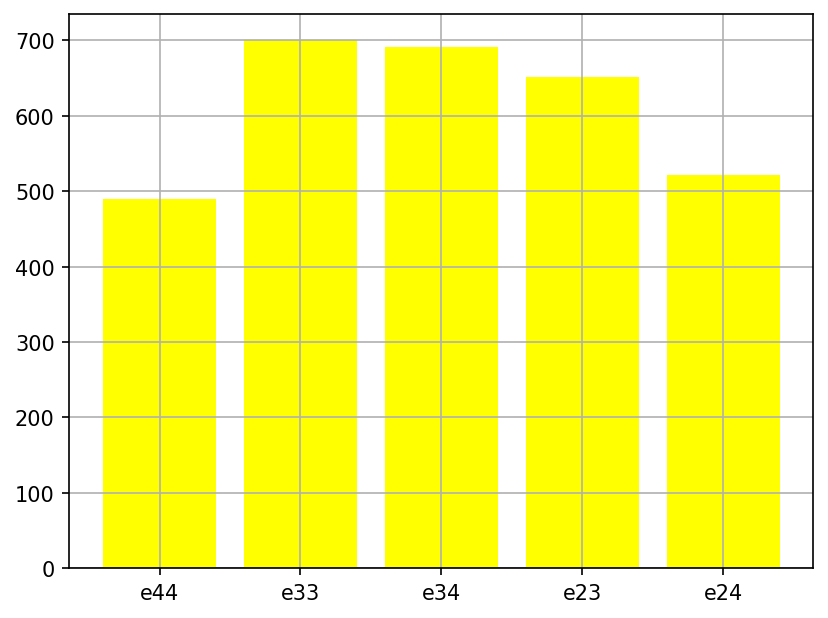

In [199]:
johnson_csf.dropna(inplace = True)
plt.figure(dpi = 150)
plt.bar(johnson_csf['APOE.Genotype'],johnson_csf['AB42.ELISA'], color = 'yellow');
plt.grid(True);

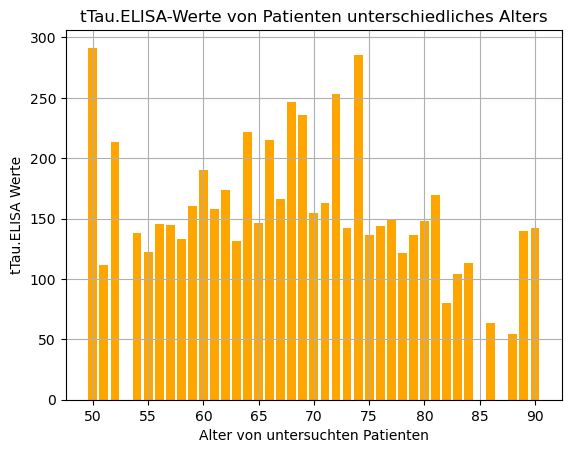

In [200]:
plt.bar(johnson_csf['Age'], johnson_csf['tTau.ELISA'], color = 'orange');
plt.title('tTau.ELISA-Werte von Patienten unterschiedliches Alters');
plt.xlabel('Alter von untersuchten Patienten');
plt.ylabel('tTau.ELISA Werte');
plt.grid(True);

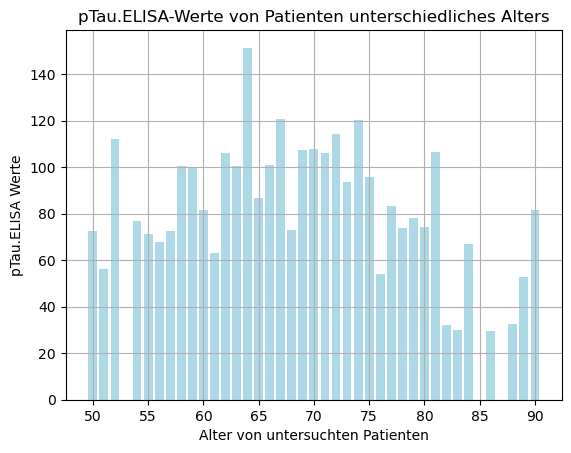

In [201]:
plt.bar(johnson_csf['Age'], johnson_csf['pTau.ELISA'], color = 'lightblue');
plt.title('pTau.ELISA-Werte von Patienten unterschiedliches Alters');
plt.xlabel('Alter von untersuchten Patienten');
plt.ylabel('pTau.ELISA Werte');
plt.grid(True);

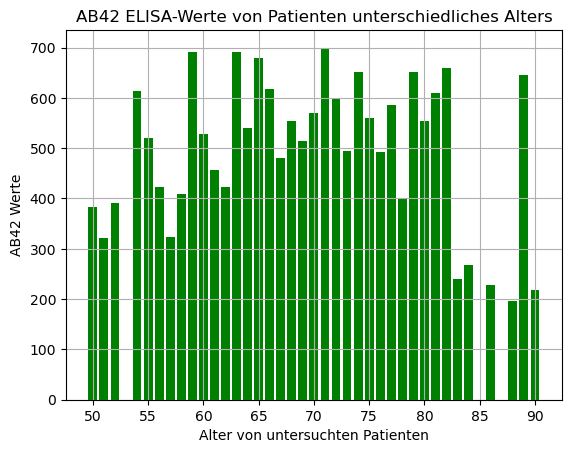

In [202]:
plt.bar(johnson_csf['Age'], johnson_csf['AB42.ELISA'], color = 'green');
plt.title('AB42 ELISA-Werte von Patienten unterschiedliches Alters');
plt.xlabel('Alter von untersuchten Patienten');
plt.ylabel('AB42 Werte');
plt.grid(True);

<Axes: >

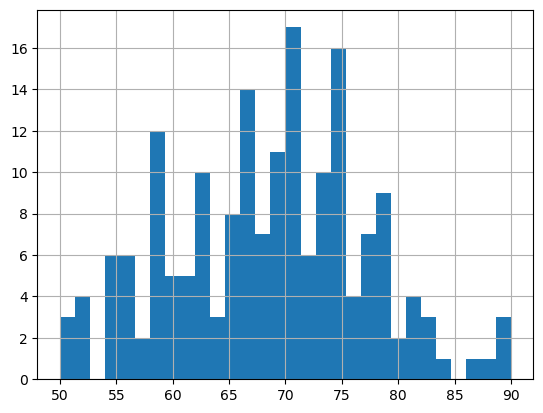

In [215]:
johnson_csf['Age'].hist(bins = 30)

<Axes: >

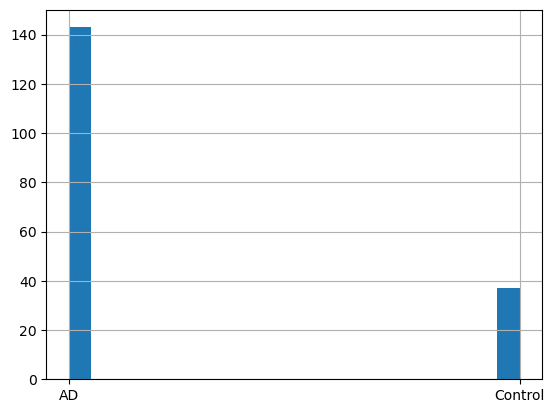

In [204]:
johnson_csf['Group'].hist(bins =20)

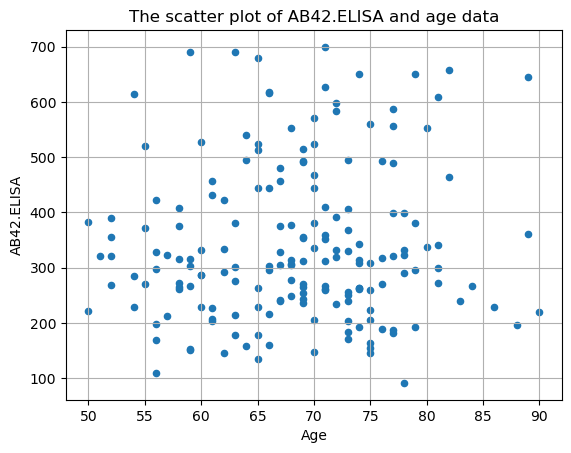

In [205]:
johnson_csf.plot.scatter(x = 'Age', y = 'AB42.ELISA',\
                        title = 'The scatter plot of AB42.ELISA and age data', grid = True);

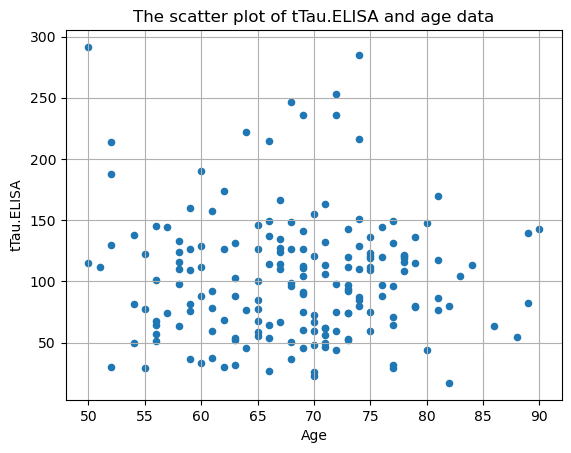

In [206]:
johnson_csf.plot.scatter(x = 'Age', y = 'tTau.ELISA',\
                         title = 'The scatter plot of tTau.ELISA and age data', grid = True);

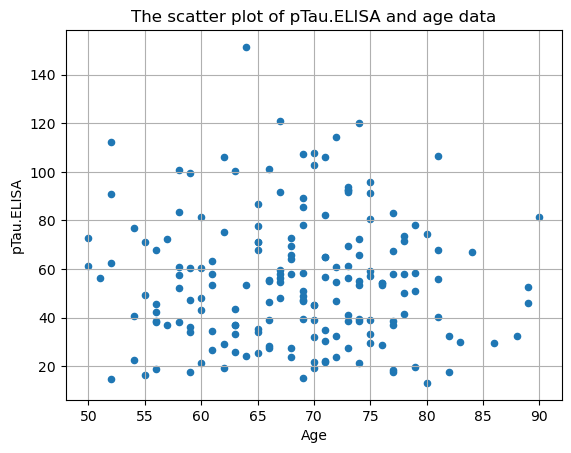

In [207]:
johnson_csf.plot.scatter(x = 'Age', y = 'pTau.ELISA', \
                         title = 'The scatter plot of pTau.ELISA and age data', grid = True);

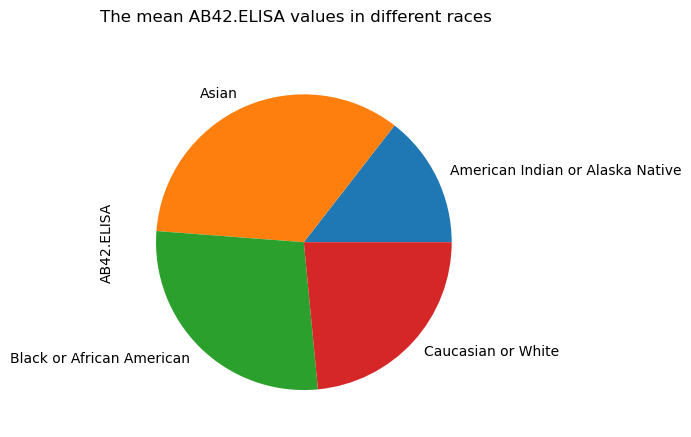

In [208]:
johnson_csf.groupby('Race')['AB42.ELISA'].mean().plot.pie(subplots = True,\
                                                         title = 'The mean AB42.ELISA values in different races');

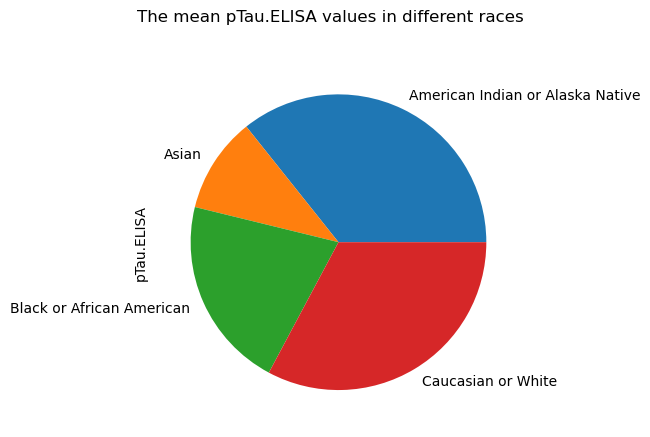

In [209]:
johnson_csf.groupby('Race')['pTau.ELISA'].mean().plot.pie(subplots = True,\
                                                         title = 'The mean pTau.ELISA values in different races');

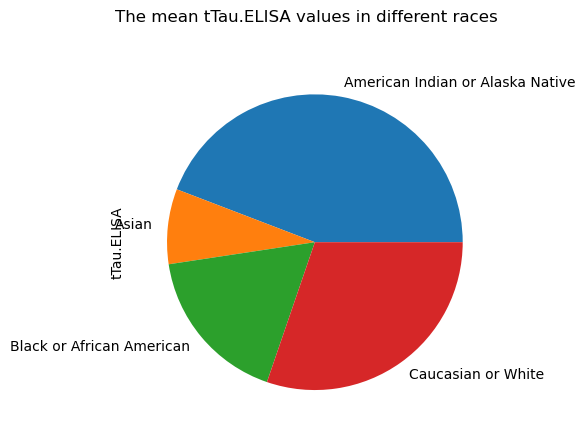

In [210]:
johnson_csf.groupby('Race')['tTau.ELISA'].mean().plot.pie(subplots = True,\
                                                         title = 'The mean tTau.ELISA values in different races');

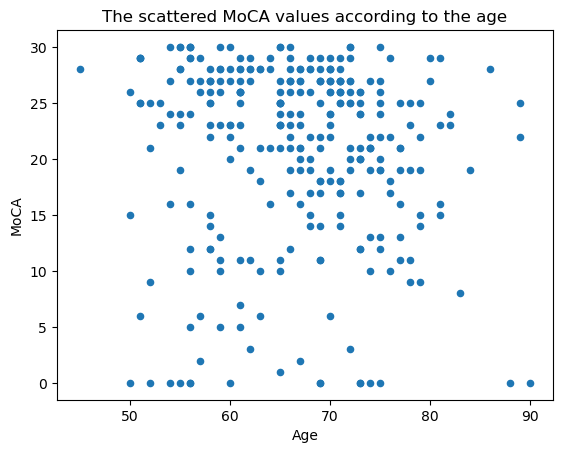

In [191]:
# johnson_csf.groupby('Group')[['MoCA', 'AB42.ELISA']]
# MoCA - montreal cognitive assessment 

johnson_csf.plot.scatter('Age','MoCA', title = 'The scattered MoCA values according to the age');
# z = np.polyfit(johnson_csf['Age'], johnson_csf['MoCA'], 1)
# p = np.poly1d(z)
# plt.plot(johnson_csf['Age'],p(johnson_csf['Age']),"r--")


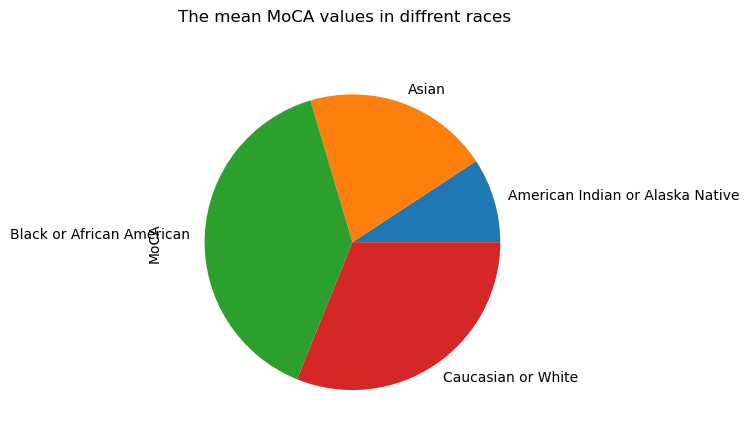

In [212]:
johnson_csf.groupby('Race')['MoCA'].agg('mean').plot.pie(subplots = True, \
                                                        title = 'The mean MoCA values in diffrent races');

In [213]:
johnson_csf.groupby('Batch')[['AB42.ELISA','tTau.ELISA', 'pTau.ELISA']].agg('mean')

,AB42.ELISA,tTau.ELISA,pTau.ELISA
Batch,,,
1,346.392500,113.650000,60.587500
2,341.505000,91.615000,55.890000
3,396.975000,98.150000,56.700000
4,320.046000,97.160000,48.328000
5,380.970000,98.452500,49.655000
6,379.250000,89.961429,38.494286
7,235.500000,142.446667,70.316667
8,420.992500,96.595000,61.180000
9,290.478571,155.317143,63.768571


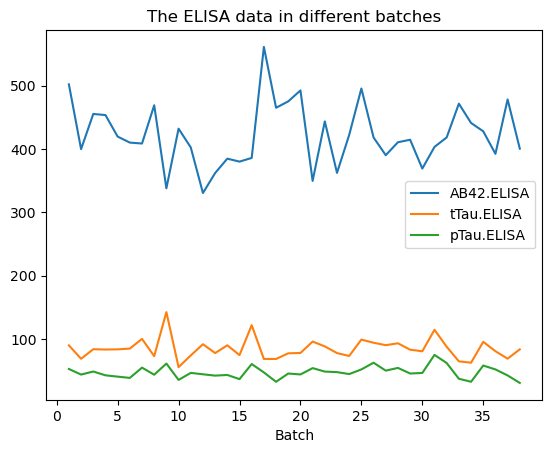

In [194]:
johnson_csf.groupby('Batch')[['AB42.ELISA','tTau.ELISA', 'pTau.ELISA']].agg('mean').plot(title = 'The ELISA data in different batches');



In [216]:
johnson_csf.corr()

/var/folders/pw/3pl1m0wd11j_fd7f7cz56q8h0000gn/T/ipykernel_29561/3772097795.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  johnson_csf.corr()


,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Risk
Batch,1.000000,0.112843,0.099511,0.111265,0.054468,0.004850,0.132907,0.067320,-0.001469
Age,0.112843,1.000000,0.149620,0.164240,0.067380,-0.032341,-0.019014,0.143276,0.030839
Sex,0.099511,0.149620,1.000000,0.094513,-0.144550,-0.083862,0.010337,-0.086446,0.043815
MoCA,0.111265,0.164240,0.094513,1.000000,0.422452,-0.317093,-0.260309,-0.069636,-0.056419
AB42.ELISA,0.054468,0.067380,-0.144550,0.422452,1.000000,-0.058564,-0.073688,-0.007972,-0.319215
tTau.ELISA,0.004850,-0.032341,-0.083862,-0.317093,-0.058564,1.000000,0.666698,0.107509,0.204621
pTau.ELISA,0.132907,-0.019014,0.010337,-0.260309,-0.073688,0.666698,1.000000,0.116929,0.213994
DMDfound,0.067320,0.143276,-0.086446,-0.069636,-0.007972,0.107509,0.116929,1.000000,0.071680
APOE.Risk,-0.001469,0.030839,0.043815,-0.056419,-0.319215,0.204621,0.213994,0.071680,1.000000
